# Projekt końcowy

### Poniższy projekt ma na celu zbudowanie modelu klasyfikacyjnego, który na podstawie podanych danych będzie przewidywał, czy potencjalny pożyczkobiorca spłaci swój dług.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from numpy import mean
from matplotlib import pyplot
from scipy.spatial.distance import euclidean
from sklearn.ensemble import RandomForestClassifier
from ds_utils.unsupervised import plot_loss_vs_cluster_number
from imblearn.pipeline import Pipeline
import matplotlib as mpl
from cycler import cycler
from sklearn.model_selection import ShuffleSplit
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import roc_curve

In [2]:
pip install data-science-utils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip3 install catboost

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip3 install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [7]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Wczytanie danych

In [8]:
df=pd.read_csv('Loan_data.csv')

C:\Users\asus\AppData\Local\Temp\ipykernel_4728\140937924.py:1: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Loan_data.csv')


In [9]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(42536, 151)

In [11]:
#Dane zawierają 42536 obserwacji i 151 kolumn - łącznie z kolumną ze statusem pożyczki (zmienna objaśniana)

In [12]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [14]:
df.keys()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [15]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.373774,15.563690,4.085255
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842.750000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.100000,60.652500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


In [16]:
#Importuję opis zmiennych 
df_description = pd.read_csv('LCDataDictionary.csv')

In [17]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 151)
pd.set_option('display.max_colwidth', 2000)
pd.set_option('max_colwidth', 2000)
pd.options.display.float_format = '{:.3f}'.format

In [18]:
df_description[['LoanStatNew', 'Description']]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


### Sprawdzam brakujące wartości

In [19]:
df.isna().sum()

id                                                0
member_id                                     42536
loan_amnt                                         1
funded_amnt                                       1
funded_amnt_inv                                   1
term                                              1
int_rate                                          1
installment                                       1
grade                                             1
sub_grade                                         1
emp_title                                      2627
emp_length                                     1113
home_ownership                                    1
annual_inc                                        5
verification_status                               1
issue_d                                           1
loan_status                                       1
pymnt_plan                                        1
url                                               1
desc        

In [20]:
#Sprawdzam i usuwam kolumny w 100% z nan

In [21]:
nan_cols = [i for i in df.columns if df[i].isnull().all()]

In [22]:
nan_cols

['member_id',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_li

In [23]:
df.drop(
['member_id',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount'], 
axis=1, inplace=True)

In [24]:
#Usuwam kolumny, które zawierają nan w 85% 

In [25]:
nan_cols85 = [i for i in df.columns if df[i].isnull().sum() > 0.85*len(df)]

In [26]:
nan_cols85

['mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [27]:
df.drop(
['mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term'],
axis=1, inplace=True)

In [28]:
#Usunięcie kolumn ze zbędnymi informacjami

In [29]:
df.drop(
['url', 
 'id', 
 'zip_code', 
 'addr_state', 
 'title', 
 'issue_d',
 'last_pymnt_amnt',
 'last_pymnt_d', 
 'last_credit_pull_d',
 'emp_title',
 'disbursement_method',
 'recoveries',
 'collection_recovery_fee',
 'sub_grade'],
axis=1, inplace=True)

In [30]:
#Usunięcie kolumn, które zawierają informacje z przyszłości, niedostępne w momencie udzielania pożyczki

In [31]:
df.drop(
['delinq_2yrs', 
 'mths_since_last_delinq', 
 'delinq_amnt', 
 'hardship_flag', 
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'debt_settlement_flag',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'last_fico_range_high',
 'last_fico_range_low'],
axis=1, inplace=True)

In [32]:
#Sprawdzam, które kolumny przyjmują tylko jedną wartość. Sprawdzam też, czy zawierają NaNy i czy mogą one dać jakąś informację

In [33]:
df['application_type'].value_counts()

Individual    42535
Name: application_type, dtype: int64

In [34]:
df['application_type'].isnull().sum()

1

In [35]:
df.drop(
['application_type'],
axis=1, inplace=True)

In [36]:
df['pymnt_plan'].value_counts()

n    42535
Name: pymnt_plan, dtype: int64

In [37]:
df['pymnt_plan'].isnull().sum()

1

In [38]:
df.drop(
['pymnt_plan'],
axis=1, inplace=True)

In [39]:
df['initial_list_status'].value_counts()

f    42535
Name: initial_list_status, dtype: int64

In [40]:
df['initial_list_status'].isnull().sum()

1

In [41]:
df.drop(
['initial_list_status'],
axis=1, inplace=True)

In [42]:
df['out_prncp'].value_counts()

0.000    42535
Name: out_prncp, dtype: int64

In [43]:
df['out_prncp'].isnull().sum()

1

In [44]:
df.drop(
['out_prncp'],
axis=1, inplace=True)

In [45]:
df['out_prncp_inv'].value_counts()

0.000    42535
Name: out_prncp_inv, dtype: int64

In [46]:
df['out_prncp_inv'].isnull().sum()

1

In [47]:
df.drop(
['out_prncp_inv'],
axis=1, inplace=True)

In [48]:
df['policy_code'].value_counts()

1.000    42535
Name: policy_code, dtype: int64

In [49]:
df['policy_code'].isnull().sum()

1

In [50]:
df.drop(
['policy_code'],
axis=1, inplace=True)

In [51]:
df['collections_12_mths_ex_med'].value_counts()

0.000    42390
Name: collections_12_mths_ex_med, dtype: int64

In [52]:
df['collections_12_mths_ex_med'].isnull().sum()

146

In [53]:
df.drop(
['collections_12_mths_ex_med'],
axis=1, inplace=True)

In [54]:
df['tax_liens'].value_counts()

0.000    42429
1.000        1
Name: tax_liens, dtype: int64

In [55]:
df['tax_liens'].isnull().sum()

106

In [56]:
df.drop(
['tax_liens'],
axis=1, inplace=True)

In [57]:
#Decuję też usunąć kolumnę 'desc' - w większości powiela ona dane z kolumny 'purpose'
df.drop(['desc'],
axis=1, inplace=True)

In [58]:
df.shape

(42536, 24)

### Przekształcenie wartości w kolumnach - usunięcie procentów, dodatkowych znaków, itd

In [59]:
def usuniecie_miesiecy(df, column):
    df[column] = pd.to_numeric(df[column].str.replace('months', ''))

In [60]:
usuniecie_miesiecy(df, 'term')

In [61]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,4975.000,36.000,10.65%,162.870,B,10+ years,RENT,24000.000,Verified,Fully Paid,credit_card,27.650,Jan-1985,735.000,739.000,1.000,3.000,0.000,13648.000,83.7%,9.000,0.000
1,2500.000,2500.000,2500.000,60.000,15.27%,59.830,C,< 1 year,RENT,30000.000,Source Verified,Charged Off,car,1.000,Apr-1999,740.000,744.000,5.000,3.000,0.000,1687.000,9.4%,4.000,0.000
2,2400.000,2400.000,2400.000,36.000,15.96%,84.330,C,10+ years,RENT,12252.000,Not Verified,Fully Paid,small_business,8.720,Nov-2001,735.000,739.000,2.000,2.000,0.000,2956.000,98.5%,10.000,0.000
3,10000.000,10000.000,10000.000,36.000,13.49%,339.310,C,10+ years,RENT,49200.000,Source Verified,Fully Paid,other,20.000,Feb-1996,690.000,694.000,1.000,10.000,0.000,5598.000,21%,37.000,0.000
4,3000.000,3000.000,3000.000,60.000,12.69%,67.790,B,1 year,RENT,80000.000,Source Verified,Fully Paid,other,17.940,Jan-1996,695.000,699.000,0.000,15.000,0.000,27783.000,53.9%,38.000,0.000


In [62]:
#usuwam dodatkowe znaki z kolumny 'emp_length'

In [63]:
df['emp_length'].value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [64]:
def usuniecie_znakow(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')

In [65]:
usuniecie_znakow(df,'emp_length')

C:\Users\asus\AppData\Local\Temp\ipykernel_4728\1282640428.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


In [66]:
df['emp_length'].value_counts()

10    9369
0     5062
2     4743
3     4364
4     3649
1     3595
5     3458
6     2375
7     1875
8     1592
9     1341
Name: emp_length, dtype: int64

In [67]:
df['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [68]:
#przekształcenie procentow

In [69]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100.0

In [70]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

In [71]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,10,RENT,24000.000,Verified,Fully Paid,credit_card,27.650,Jan-1985,735.000,739.000,1.000,3.000,0.000,13648.000,0.837,9.000,0.000
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,0,RENT,30000.000,Source Verified,Charged Off,car,1.000,Apr-1999,740.000,744.000,5.000,3.000,0.000,1687.000,0.094,4.000,0.000
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,10,RENT,12252.000,Not Verified,Fully Paid,small_business,8.720,Nov-2001,735.000,739.000,2.000,2.000,0.000,2956.000,0.985,10.000,0.000
3,10000.000,10000.000,10000.000,36.000,0.135,339.310,C,10,RENT,49200.000,Source Verified,Fully Paid,other,20.000,Feb-1996,690.000,694.000,1.000,10.000,0.000,5598.000,0.210,37.000,0.000
4,3000.000,3000.000,3000.000,60.000,0.127,67.790,B,1,RENT,80000.000,Source Verified,Fully Paid,other,17.940,Jan-1996,695.000,699.000,0.000,15.000,0.000,27783.000,0.539,38.000,0.000


In [72]:
#wartości związane z datą

In [73]:
df['earliest_cr_line'].value_counts()

Oct-1999    393
Nov-1998    390
Oct-2000    370
Dec-1998    366
Dec-1997    348
           ... 
Jul-1964      1
Mar-1963      1
Nov-1965      1
Apr-1966      1
Nov-1959      1
Name: earliest_cr_line, Length: 530, dtype: int64

In [74]:
df['earliest_cr_line'].dtypes

dtype('O')

In [75]:
#df['earliest_cr_line'].dt.year

In [76]:
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year

In [77]:
df['earliest_cr_line'].value_counts()

2000.000    3436
1999.000    3152
1998.000    3066
2001.000    2667
1997.000    2622
1996.000    2426
1995.000    2292
1994.000    2166
2002.000    2059
2003.000    1976
2004.000    1890
2005.000    1639
1993.000    1610
2006.000    1343
1992.000    1155
1990.000    1113
1991.000    1039
1989.000     931
1988.000     783
2007.000     767
1987.000     664
1986.000     533
1985.000     486
1984.000     433
1983.000     360
1982.000     238
1981.000     207
1980.000     187
1979.000     178
1978.000     173
2008.000     160
1977.000     124
1976.000     112
1975.000      87
1974.000      71
1973.000      69
1972.000      56
1971.000      50
1970.000      49
1969.000      41
1968.000      23
1967.000      18
1963.000      12
1966.000      11
1964.000       9
1965.000       9
1962.000       5
1954.000       2
1959.000       2
1961.000       2
1956.000       1
1946.000       1
1950.000       1
Name: earliest_cr_line, dtype: int64

In [78]:
#zamieniam wartości 'verification_status' na dwie wartości 0 i 1. 

In [79]:
df['verification_status'].value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

In [80]:
df['verification_status2'] = np.where(df['verification_status'].isin(
    ['Verified', 'Source Verified']), 0, 1)

In [81]:
df['verification_status2'].value_counts()

0    23777
1    18759
Name: verification_status2, dtype: int64

In [82]:
#usuwam pierwotną kolumnę 'verification_status'
df.drop(columns = ['verification_status'], inplace = True)

### BRAKUJĄCE WARTOŚCI

In [83]:
df.isna().sum()

loan_amnt                  1
funded_amnt                1
funded_amnt_inv            1
term                       1
int_rate                   1
installment                1
grade                      1
emp_length              1113
home_ownership             1
annual_inc                 5
loan_status                1
purpose                    1
dti                        1
earliest_cr_line          30
fico_range_low             1
fico_range_high            1
inq_last_6mths            30
open_acc                  30
pub_rec                   30
revol_bal                  1
revol_util                91
total_acc                 30
pub_rec_bankruptcies    1366
verification_status2       0
dtype: int64

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'term'}>],
       [<AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>],
       [<AxesSubplot:title={'center':'earliest_cr_line'}>,
        <AxesSubplot:title={'center':'fico_range_low'}>,
        <AxesSubplot:title={'center':'fico_range_high'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>],
       [<AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>],
       [<AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'pub_rec_bankruptcies'}>,
        <AxesSubplot:title={'

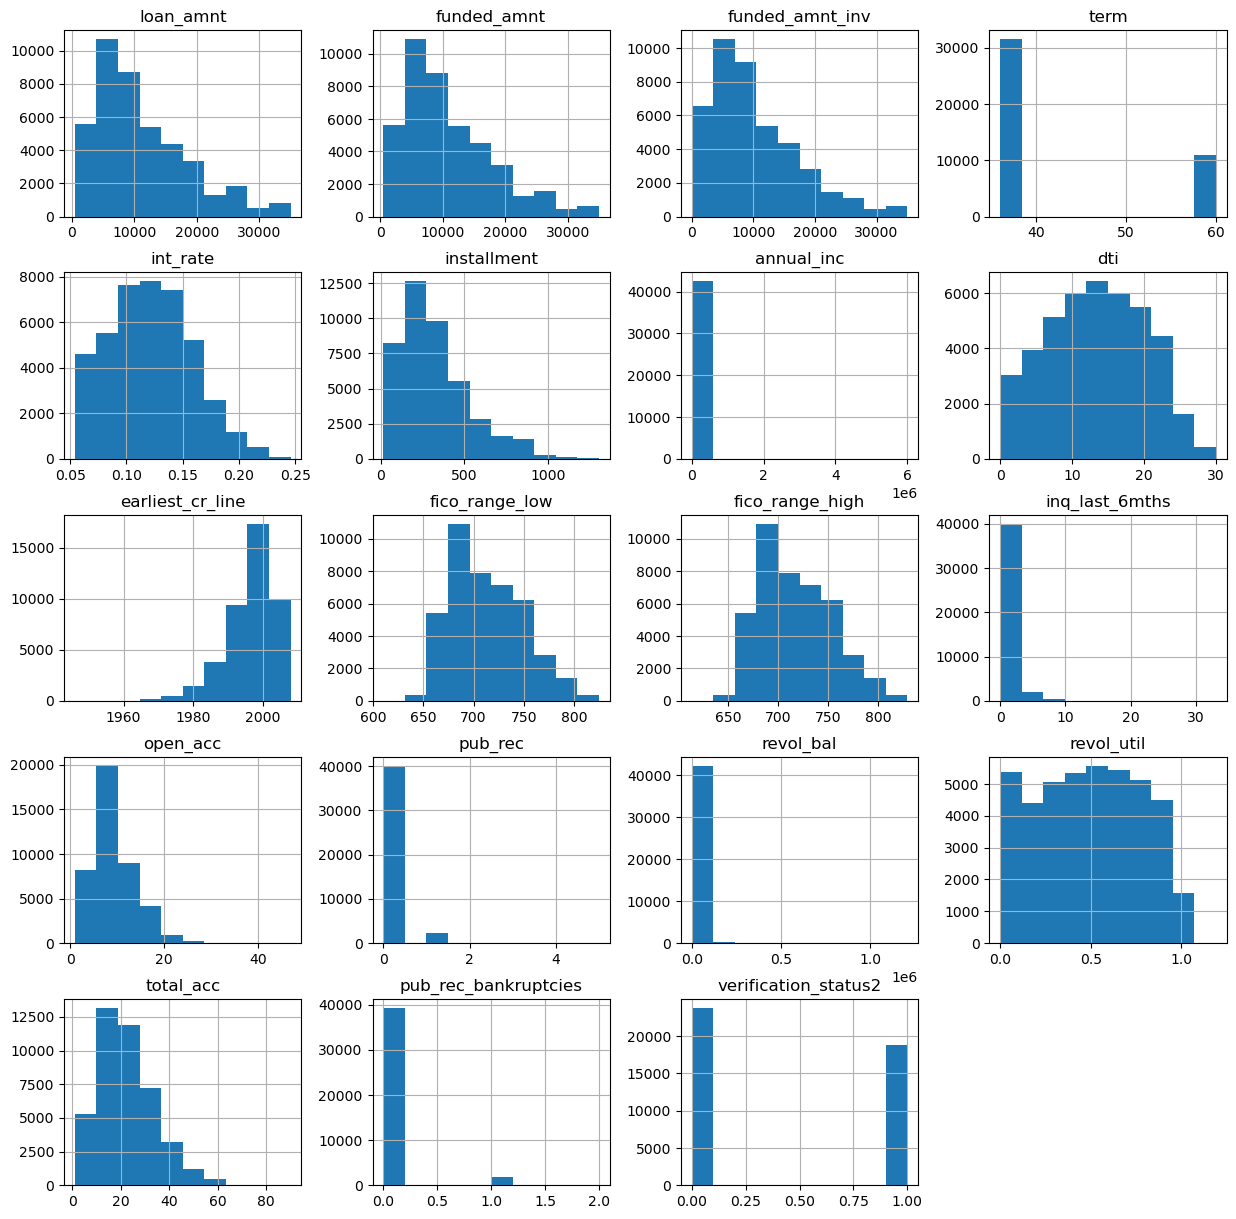

In [84]:
df.hist(figsize=(15,15))

In [85]:
#Uzupełniam brakujące wartości - na podstawie histogramu decyduję, czy uzupełniam medianą, czy najczęściej występującą wartością

In [86]:
# Dane kategoryczne

# Będę je uzupełniać najczęściej występującą wartością
# Najczęściej występującą wartość 'term' to 36
# Najczęściej występującą wartość 'grade' to B
# Najczęściej występującą wartość 'home_ownership' to 'RENT'
# Najczęściej występującą wartość 'purpose' to debt_consolidation'

In [87]:
#term
df['term'].value_counts()

36.000    31534
60.000    11001
Name: term, dtype: int64

In [88]:
df['term'].fillna(36.0, inplace=True)

In [89]:
#grade
df['grade'].value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [90]:
df['grade'].fillna('B', inplace=True)

In [91]:
#home_ownership
df['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [92]:
df['home_ownership'].fillna('RENT', inplace=True)

In [93]:
#purpose
df['purpose'].value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

In [94]:
df['purpose'].fillna('debt_consolidation', inplace=True)

In [95]:
#loan_status
df['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [96]:
df['loan_status'].fillna('Fully Paid', inplace=True)

In [97]:
# Dane numeryczne
# Będę je uzupełniać medianą

In [98]:
#loan_amnt
df['loan_amnt'].fillna(df['loan_amnt'].median(), inplace=True)

In [99]:
#funded_amnt
df['funded_amnt'].fillna(df['funded_amnt'].median(), inplace=True)

In [100]:
#funded_amnt_inv
df['funded_amnt_inv'].fillna(df['funded_amnt_inv'].median(), inplace=True)

In [101]:
#int_rate
df['int_rate'].fillna(df['int_rate'].median(), inplace=True)

In [102]:
#installment
df['installment'].fillna(df['installment'].median(), inplace=True)

In [103]:
#emp_length
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)

In [104]:
#annual_inc
df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)

In [105]:
#dti
df['dti'].fillna(df['dti'].median(), inplace=True)

In [106]:
#fico_range_low
df['fico_range_low'].fillna(df['fico_range_low'].median(), inplace=True)

In [107]:
#fico_range_high
df['fico_range_high'].fillna(df['fico_range_high'].median(), inplace=True)

In [108]:
#inq_last_6mths
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)

In [109]:
#open_acc
df['open_acc'].fillna(df['open_acc'].median(), inplace=True)

In [110]:
#pub_rec
df['pub_rec'].fillna(df['pub_rec'].median(), inplace=True)

In [111]:
#revol_bal
df['revol_bal'].fillna(df['revol_bal'].median(), inplace=True)

In [112]:
#revol_util
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

In [113]:
#total_acc
df['total_acc'].fillna(df['total_acc'].median(), inplace=True)

In [114]:
#pub_rec_bankruptcies
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(), inplace=True)

In [115]:
#earliest_cr_line
df['earliest_cr_line'].fillna(df['earliest_cr_line'].median(), inplace=True)

In [116]:
#inq_last_6mths
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(), inplace=True)

In [117]:
df.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
verification_status2    0
dtype: int64

# EDA

### Kolumna ze statusem pożyczki

In [118]:
# Zmienną objaśnianą jest kolumna ze statusem pożyczki - 'loan_status. Zadaniem jest przewidzenie, 
# czy klient spłaci kredyt - 1, czy nie spłaci - 0

In [119]:
df['loan_status'].value_counts()

Fully Paid                                             34117
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [120]:
#zamieniam wartości "loan_status" na dwie wartości 0 i 1. 

In [121]:
df['niesplacony_splacony'] = np.where(df['loan_status'].isin(
    ['Charged Off','Does not meet the credit policy. Status:Charged Off']), 0, 1)

In [122]:
df['niesplacony_splacony'].value_counts()

1    36105
0     6431
Name: niesplacony_splacony, dtype: int64

In [123]:
#usuwam pierwotną kolumnę loan_status
df.drop(columns = ['loan_status'], inplace = True)

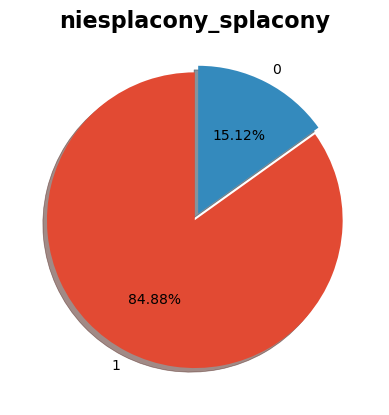

In [124]:
#Chcę sprawdzić, jaki rozkład ma zmienna dotycząca spłaty pożyczki. 

plt.style.use('ggplot')

data = df['niesplacony_splacony'].value_counts(normalize=True)
plt.pie(data, labels=data.index, startangle = 90, shadow = True, radius=1, explode= [0,0.05],autopct='%0.2f%%')
plt.title('niesplacony_splacony', fontsize=16, fontweight='bold')
plt.show()

In [125]:
#Dane są niezbalansowane - prawie 85% stanowią spłacone pożyczki, niespłacone zaledwie 15%.

### Rozkład zmiennych , korelacje

In [126]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('Liczba {} zmiennych numerycznych : {}'.format(len(numeric_features), numeric_features))
print('\nLiczba {} zmiennych kategorycznych : {}'.format(len(categorical_features), categorical_features))

Liczba 20 zmiennych numerycznych : ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'verification_status2', 'niesplacony_splacony']

Liczba 4 zmiennych kategorycznych : ['grade', 'emp_length', 'home_ownership', 'purpose']


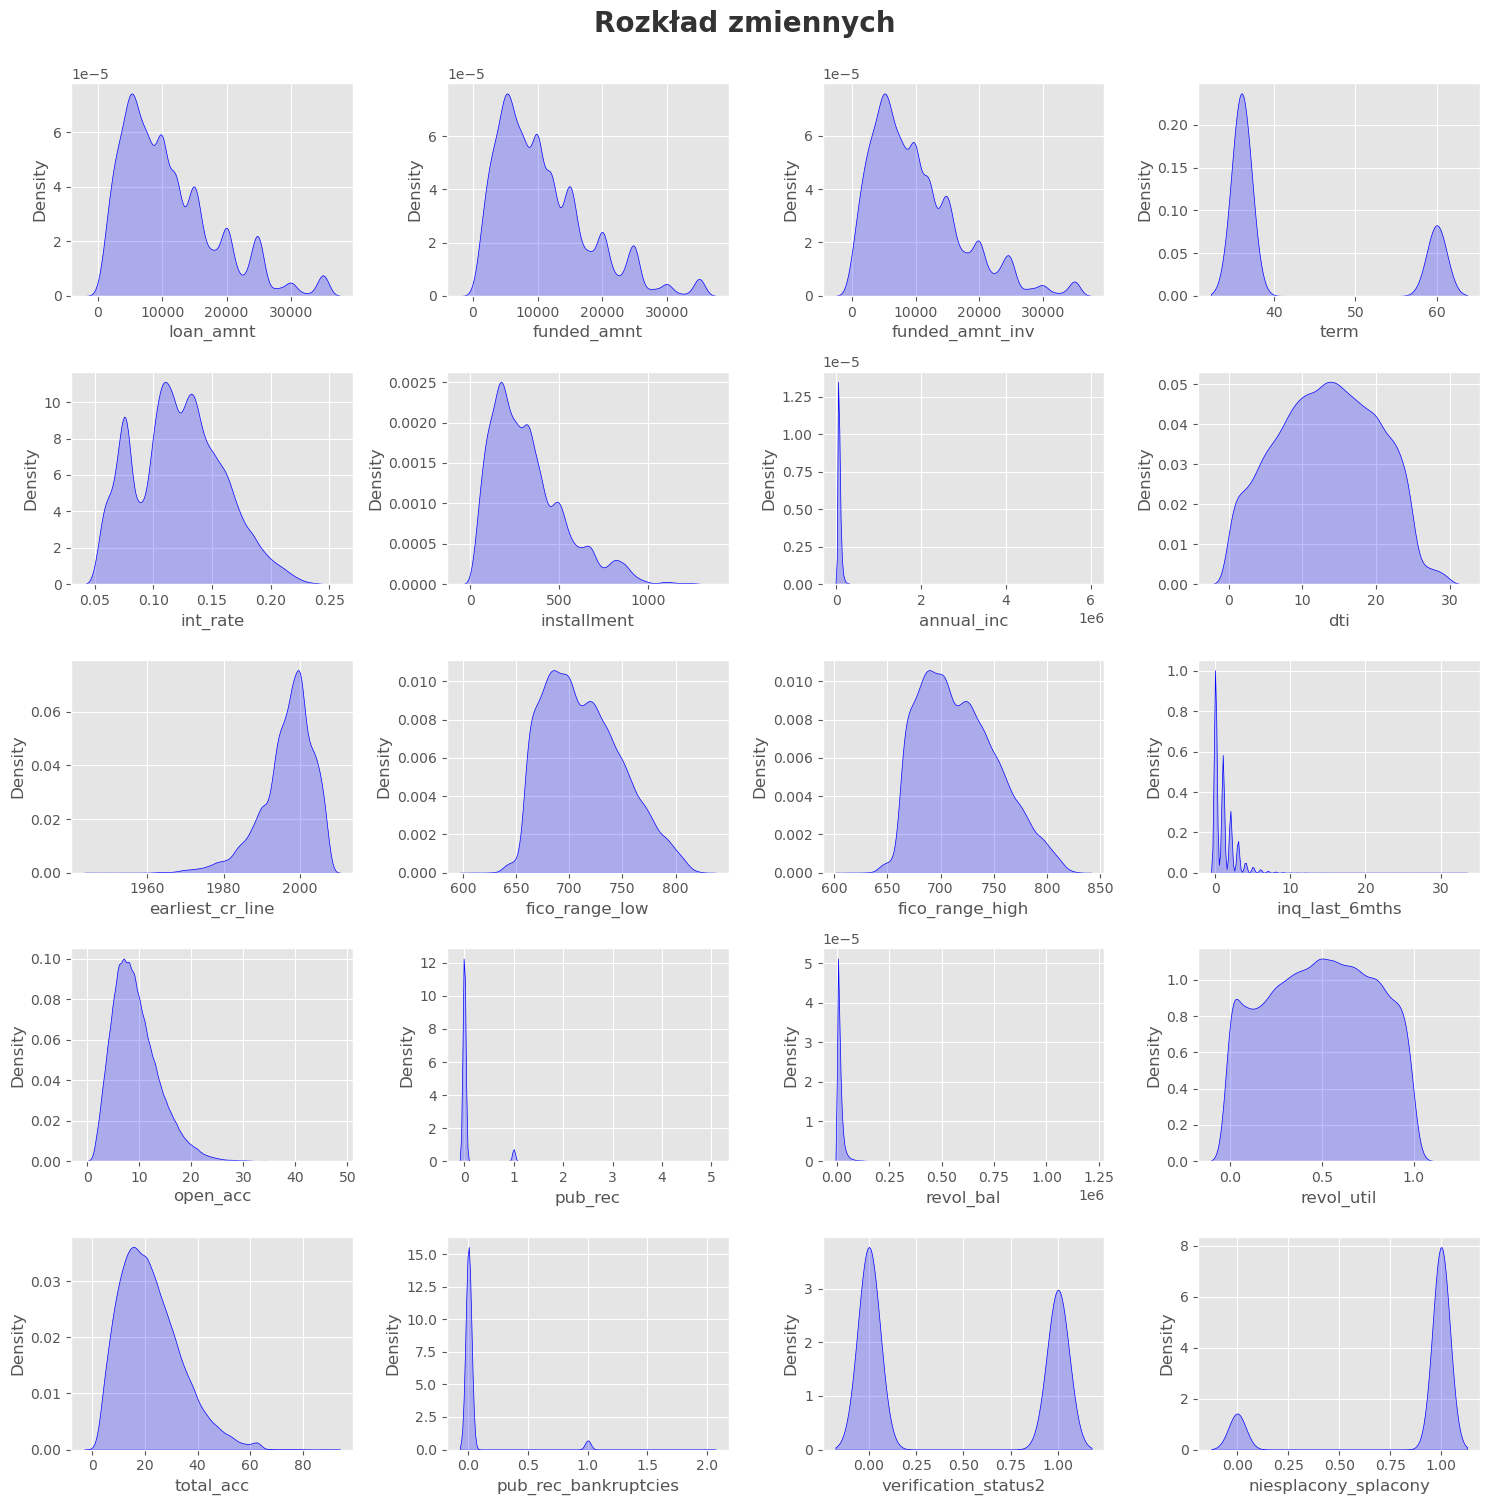

In [127]:
plt.figure(figsize=(15, 15))
plt.suptitle('Rozkład zmiennych', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [128]:
# Dti, fico, annual_inc, revol_bal mają rozkład normalny
# Prawostronnie asymetryczne - 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'total_acc'
# Lewostronnie asymetryczne - 'earliest_cr_line'

In [129]:
#Sprawdzam korelację między poszczególnymi wartościami

In [130]:
cor=df.corr()
cor

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,verification_status2,niesplacony_splacony
loan_amnt,1.000,0.982,0.930,0.356,0.292,0.931,0.276,0.065,-0.191,0.133,0.133,-0.030,0.177,-0.051,0.254,0.065,0.257,-0.035,-0.323,-0.043
funded_amnt,0.982,1.000,0.948,0.335,0.295,0.957,0.272,0.065,-0.185,0.126,0.126,-0.030,0.175,-0.052,0.250,0.069,0.251,-0.037,-0.318,-0.040
funded_amnt_inv,0.930,0.948,1.000,0.364,0.280,0.890,0.252,0.071,-0.169,0.145,0.145,-0.075,0.156,-0.055,0.212,0.070,0.241,-0.037,-0.352,-0.010
term,0.356,0.335,0.364,1.000,0.429,0.098,0.043,0.077,-0.047,0.000,0.000,-0.013,0.046,0.005,0.029,0.065,0.095,0.015,-0.254,-0.134
int_rate,0.292,0.295,0.280,0.429,1.000,0.271,0.054,0.120,0.116,-0.703,-0.703,0.179,0.025,0.100,0.082,0.456,-0.032,0.085,-0.170,-0.201
installment,0.931,0.957,0.890,0.098,0.271,1.000,0.278,0.055,-0.169,0.064,0.064,-0.011,0.175,-0.046,0.265,0.094,0.234,-0.032,-0.268,-0.021
annual_inc,0.276,0.272,0.252,0.043,0.054,0.278,1.000,-0.117,-0.189,0.052,0.052,0.028,0.168,-0.016,0.284,0.021,0.246,-0.015,-0.106,0.038
dti,0.065,0.065,0.071,0.077,0.120,0.055,-0.117,1.000,-0.055,-0.191,-0.191,0.014,0.298,-0.003,0.191,0.279,0.241,0.010,-0.036,-0.042
earliest_cr_line,-0.191,-0.185,-0.169,-0.047,0.116,-0.169,-0.189,-0.055,1.000,-0.235,-0.235,0.004,-0.236,-0.052,-0.240,0.041,-0.387,-0.058,0.026,-0.020
fico_range_low,0.133,0.126,0.145,0.000,-0.703,0.064,0.052,-0.191,-0.235,1.000,1.000,-0.136,-0.026,-0.152,-0.022,-0.543,0.111,-0.124,-0.006,0.142


<AxesSubplot:>

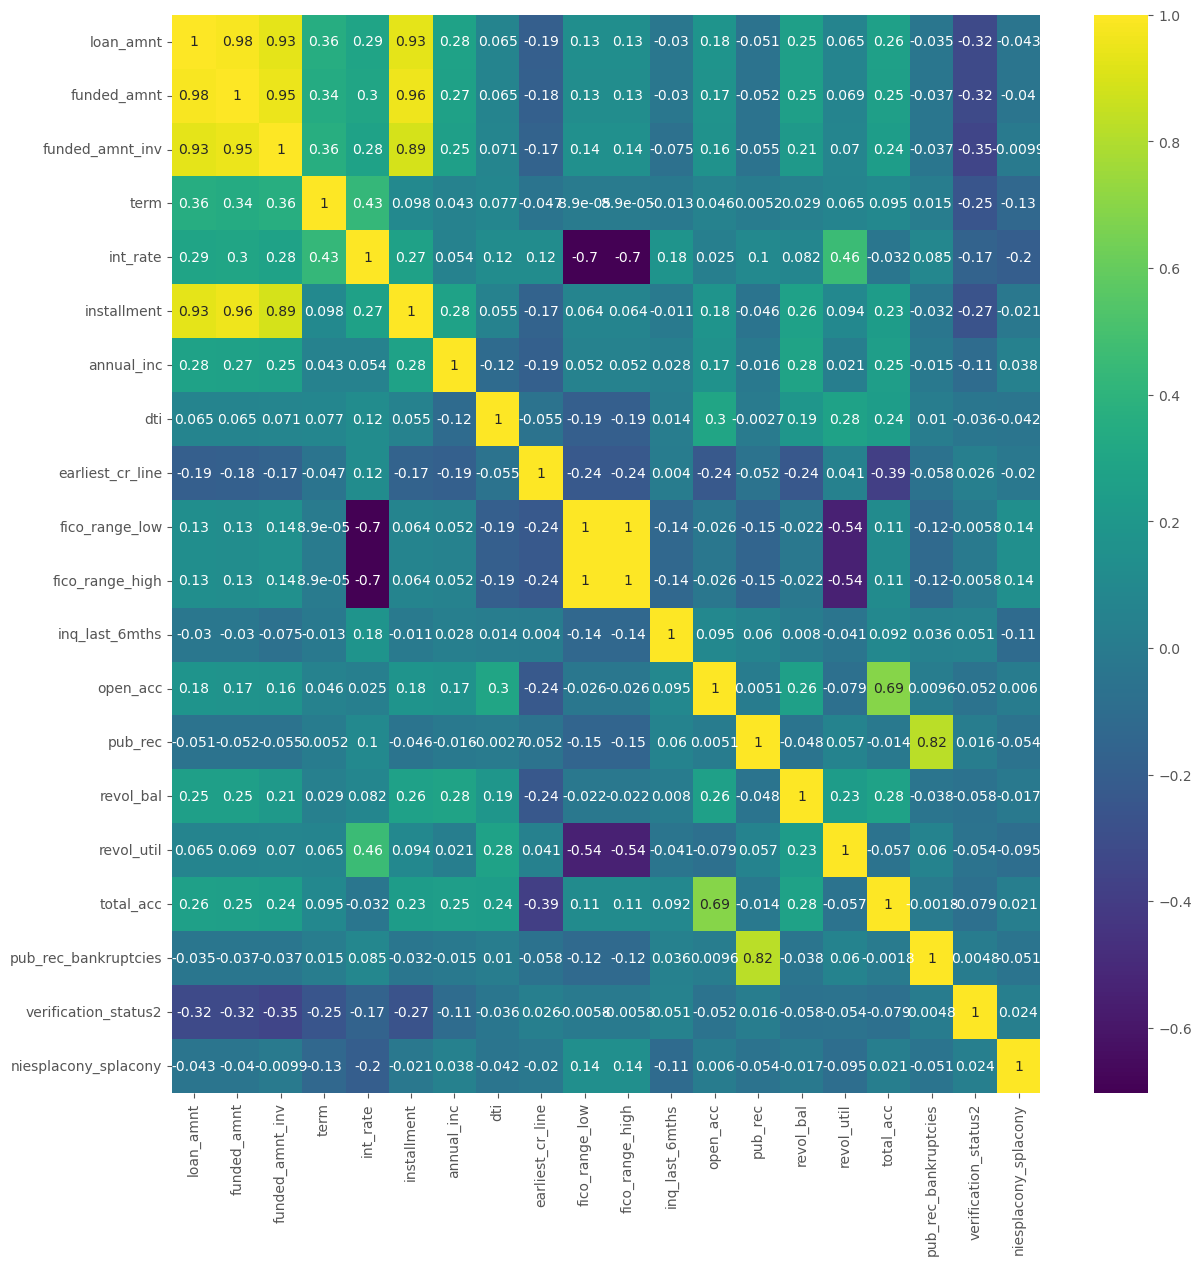

In [131]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [132]:
#Najlepiej skorelowane z daną wyjściową są: 'fico range high' oraz 'fico range low' 
#najbardziej odwrotnie skoelowane są 'int_rate', 'term'

In [133]:
#Wartości 'funded_amnt' i 'funded_amnt_inv' są silnie skorelowane ze sobą oraz wartością 'loan_amnt'
#Przedstawiają tę samą informację w różny sposób, dlatego decyduję się je usunąć.

In [134]:
df.drop(columns = ['funded_amnt', 'funded_amnt_inv'], inplace = True)

In [135]:

# Z tabeli wynika, że osoby mające problemy ze spłatą kredytu mają niższy roczny dochód, 
# wyższy wskaźnik dti (jaki procent zarobków stanowi rata kredytu). 
# Mają niższe wskaźniki fico, wyższe oprocentowanie kredytu. Płacą też wyższe raty.

pd.pivot_table(df, index='niesplacony_splacony', aggfunc='mean')

,annual_inc,dti,earliest_cr_line,fico_range_high,fico_range_low,inq_last_6mths,installment,int_rate,loan_amnt,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,term,total_acc,verification_status2
niesplacony_splacony,,,,,,,,,,,,,,,,,
0,63366.871,14.046,1996.906,704.884,700.884,1.483,333.065,0.139,11837.428,9.280,0.089,0.068,15194.459,0.555,45.535,21.544,0.413
1,70162.845,13.253,1996.526,719.220,715.220,1.010,320.762,0.119,10956.503,9.355,0.053,0.039,14138.008,0.480,41.614,22.226,0.446


In [136]:
# Do analizy wybrałam kolumny: 'int_rate', 'annual_inc', 'dti', 'loan_amnt', 'term', 
# 'installment', 'home_ownership', 'grade', 'fico range high', 'fico range low', 'purpose'

In [137]:
#Funkcje, których będę używała do obliczeń dla wybranych zmiennych

In [138]:
def statystyka (df, zmienna):
    '''
    Ta funkcja oblicza podstawowe statystyki dla poszczegolnych zmiennych ze zbioru df
    '''
    print('Minimum: ', df[zmienna].min())
    print('Maximum: ',df[zmienna].max())
    print('Mean value: ', df[zmienna].mean())
    print('Median value: ',df[zmienna].median())
    print('Standard deviation: ', df[zmienna].std())

In [139]:
def kwartyle(df, zmienna):
    Q1=df[zmienna].quantile(q=0.25)
    Q3=df[zmienna].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(df[zmienna]))

In [140]:
def gorny_dolny_outlier(dr, zmienna, Q1, Q3):
    '''
    Ta funkcja wylicza zakres od 1. do 3. kwartyla. Powyżej 3. kwartyla wartości należą do outlierow
    '''
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers: ', L_outliers)
    print('Upper outliers: ', U_outliers)

In [141]:
def liczba_outlierow (df, wartosc, upper_out, lower_out):
    '''
    Ta funkcja będzie pokazywała liczbę outlierow oraz ich procentowy udział
    '''
    print('Liczba outlierow upper : ', df[df[wartosc]>upper_out][wartosc].count())
    print('Liczba outlierow lower : ', df[df[wartosc]<lower_out][wartosc].count())
    print('% outlierow upper: ',(df[df[wartosc]>upper_out][wartosc].count()*100/len(df)), '%')
    print('% outlierow lower: ',(df[df[wartosc]<lower_out][wartosc].count()*100/len(df)), '%')

## Zmienne numeryczne

### INTEREST RATE

In [142]:
statystyka(df, 'int_rate')

Minimum:  0.0542
Maximum:  0.2459
Mean value:  0.12165011519652409
Median value:  0.1199
Standard deviation:  0.037078920181680304


In [143]:
kwartyle(df, 'int_rate')

1st Quartile (Q1) is:  0.09630000000000001
3st Quartile (Q3) is:  0.1472
Interquartile range (IQR) is  0.05089999999999999


In [144]:
gorny_dolny_outlier(df,'int_rate', 0.097, 0.15)

Lower outliers:  0.017500000000000016
Upper outliers:  0.22949999999999998


In [145]:
liczba_outlierow(df, 'int_rate', 0.224, 0.02)

Liczba outlierow upper :  94
Liczba outlierow lower :  0
% outlierow upper:  0.22098927966898627 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


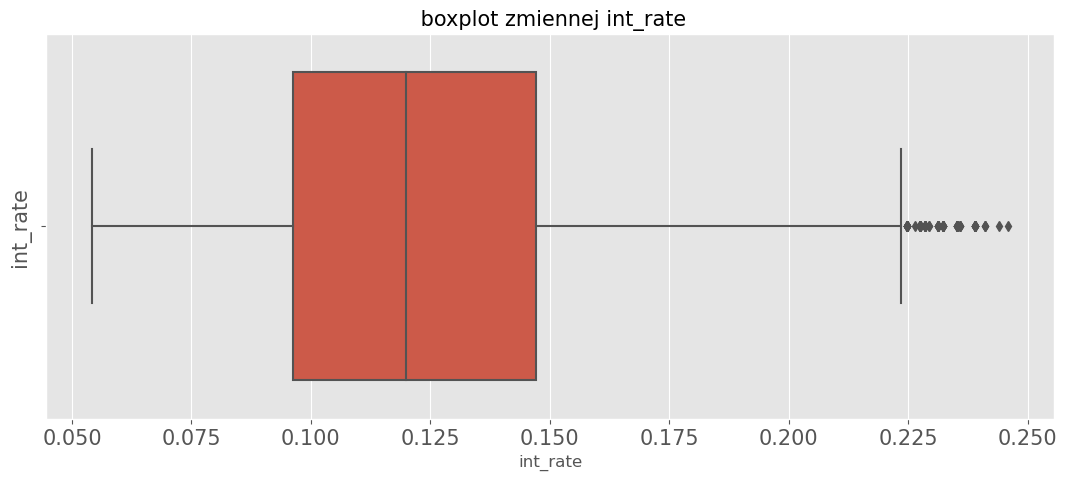

In [146]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='int_rate',data=df,orient='v',ax=ax1)
ax1.set_ylabel('int_rate', fontsize=15)
ax1.set_title(' boxplot zmiennej int_rate', fontsize=15)
ax1.tick_params(labelsize=15)

In [147]:
# Outliery powyżej 0.225

In [148]:
#Z tych danych wynika, że osoby niespłacające kredytów otrzymują wyższe oprocentowanie (średnio)

pd.pivot_table(df, index='niesplacony_splacony', values="int_rate", aggfunc='mean')

,int_rate
niesplacony_splacony,
0,0.139
1,0.119


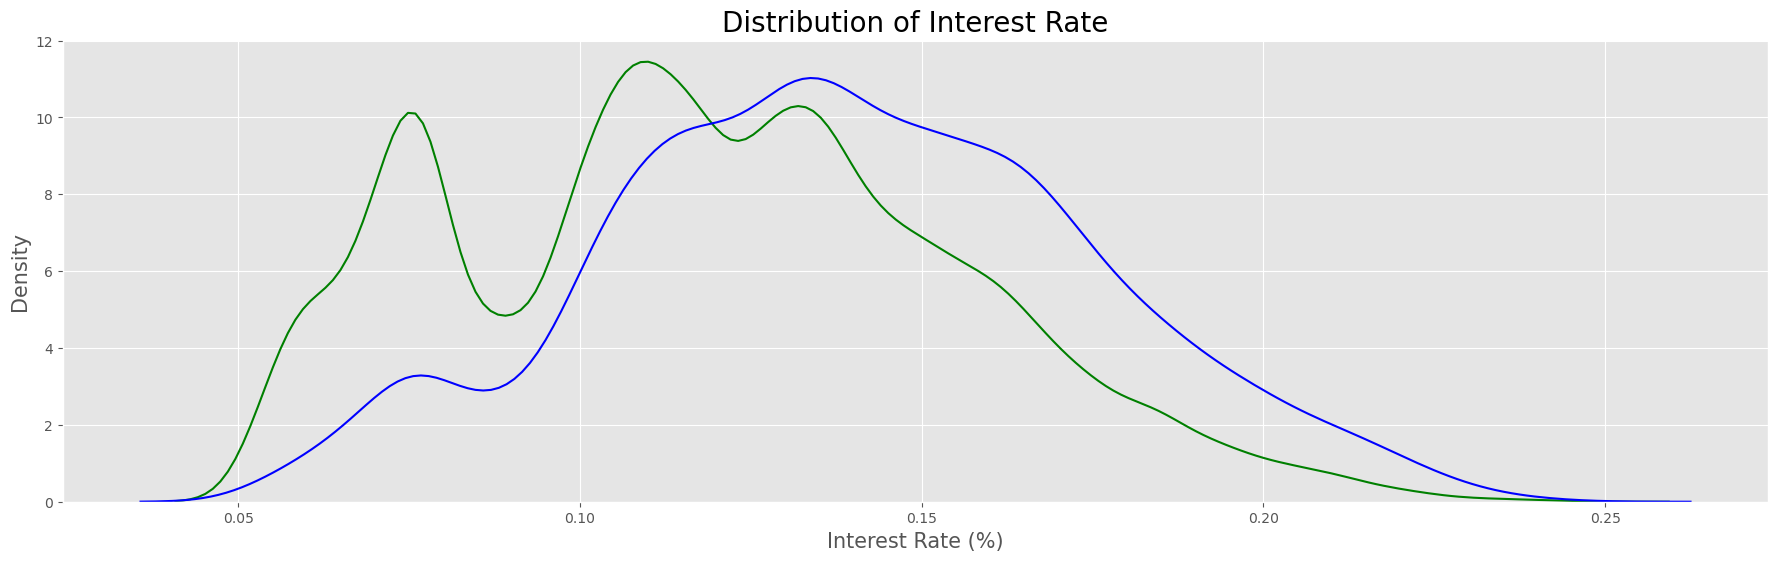

In [149]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['niesplacony_splacony'] == 1, 'int_rate'], label = 'target = 1', color = 'green')
sns.kdeplot(df.loc[df['niesplacony_splacony'] == 0, 'int_rate'], label = 'target = 0', color = 'blue');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

In [150]:
#Im wyższa klasa, tym wyższe oprocentowanie kredytu. Różnice między nie- i spłacającymi są minimalne

pd.pivot_table(df, index='niesplacony_splacony',columns="grade", values='int_rate', aggfunc='mean')

grade,A,B,C,D,E,F,G
niesplacony_splacony,,,,,,,
0,0.076,0.111,0.135,0.156,0.175,0.194,0.204
1,0.073,0.110,0.135,0.156,0.174,0.192,0.205


### ANNUAL INCOME

In [151]:
statystyka(df, 'annual_inc')

Minimum:  1896.0
Maximum:  6000000.0
Mean value:  69135.36489350203
Median value:  59000.0
Standard deviation:  64092.676551074255


In [152]:
kwartyle(df, 'annual_inc')

1st Quartile (Q1) is:  40000.0
3st Quartile (Q3) is:  82500.0
Interquartile range (IQR) is  42500.0


In [153]:
gorny_dolny_outlier(df, 'annual_inc', 40000, 82500)

Lower outliers:  -23750.0
Upper outliers:  146250.0


In [154]:
liczba_outlierow(df, 'annual_inc', 146250, -23750)

Liczba outlierow upper :  2032
Liczba outlierow lower :  0
% outlierow upper:  4.777129960504044 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


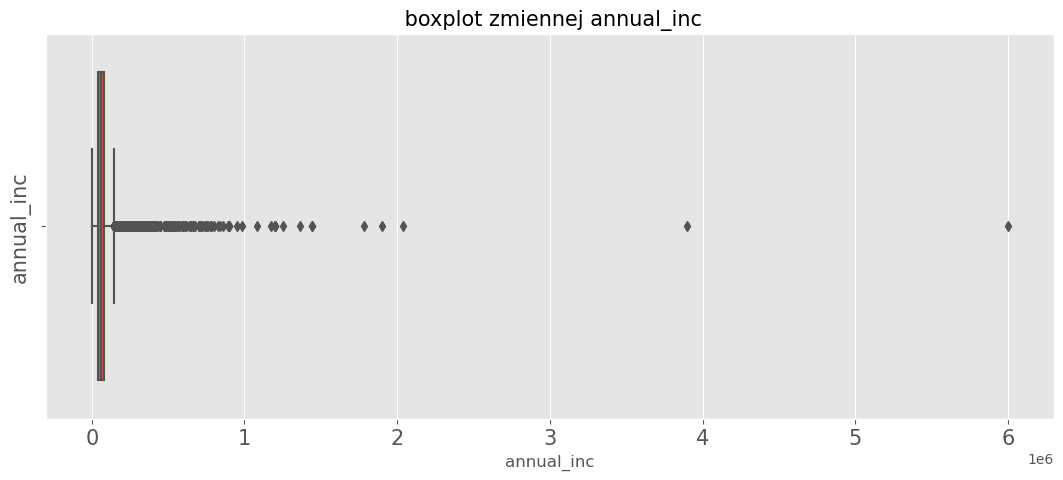

In [155]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='annual_inc',data=df,orient='v',ax=ax1)
ax1.set_ylabel('annual_inc', fontsize=15)
ax1.set_title(' boxplot zmiennej annual_inc', fontsize=15)
ax1.tick_params(labelsize=15)

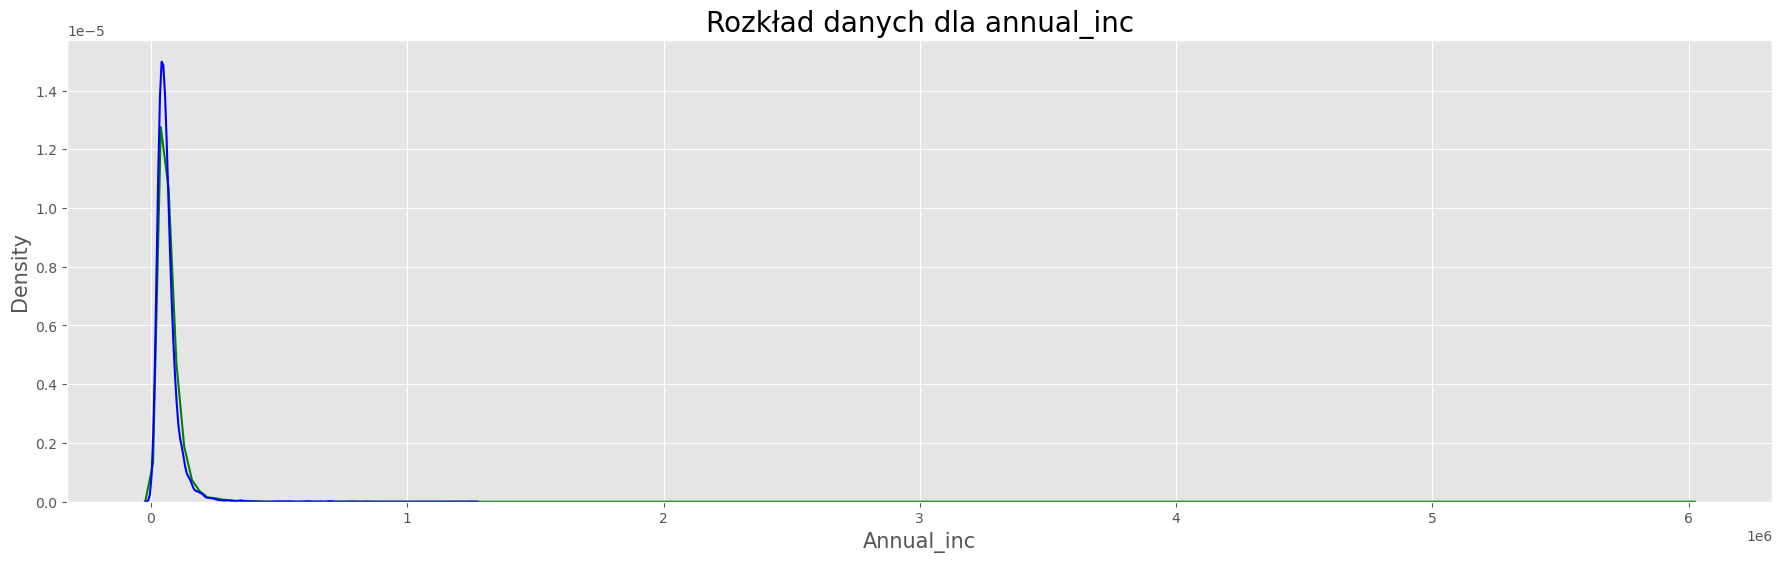

In [156]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['niesplacony_splacony'] == 1, 'annual_inc'], label = 'target = 1', color = 'green')
sns.kdeplot(df.loc[df['niesplacony_splacony'] == 0, 'annual_inc'], label = 'target = 0', color = 'blue');
plt.xlabel('Annual_inc',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Rozkład danych dla annual_inc',fontsize=20);

In [157]:
df.corr()['annual_inc'].sort_values().tail(10)

term              0.043
fico_range_high   0.052
fico_range_low    0.052
int_rate          0.054
open_acc          0.168
total_acc         0.246
loan_amnt         0.276
installment       0.278
revol_bal         0.284
annual_inc        1.000
Name: annual_inc, dtype: float64

In [158]:
#Zmienna 'annual_inc' jest wysoko pozytywnie skorelowana ze zmiennymi 'revol_bal', loan_amnt' i 'installment'

In [159]:
pd.pivot_table(df, index='niesplacony_splacony', values="annual_inc", aggfunc='mean')

,annual_inc
niesplacony_splacony,
0,63366.871
1,70162.845


In [160]:
#Osoby niespłacające mają niższe roczne dochody

### DTi

In [161]:
#Jest to wskaźnik pokazujący, jaką część miesięcznych zarobków kredytobiorcy stanowi rata kredytu. 

In [162]:
statystyka(df, 'dti')

Minimum:  0.0
Maximum:  29.99
Mean value:  13.373045420349804
Median value:  13.47
Standard deviation:  6.7262358496920145


In [163]:
kwartyle(df, 'dti')

1st Quartile (Q1) is:  8.2
3st Quartile (Q3) is:  18.68
Interquartile range (IQR) is  10.48


In [164]:
gorny_dolny_outlier(df, 'dti', 8.2, 10.48)

Lower outliers:  4.779999999999998
Upper outliers:  13.900000000000002


In [165]:
liczba_outlierow(df, 'dti', 13.90, 4.78)

Liczba outlierow upper :  20320
Liczba outlierow lower :  5217
% outlierow upper:  47.77129960504043 %
% outlierow lower:  12.264905021628739 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


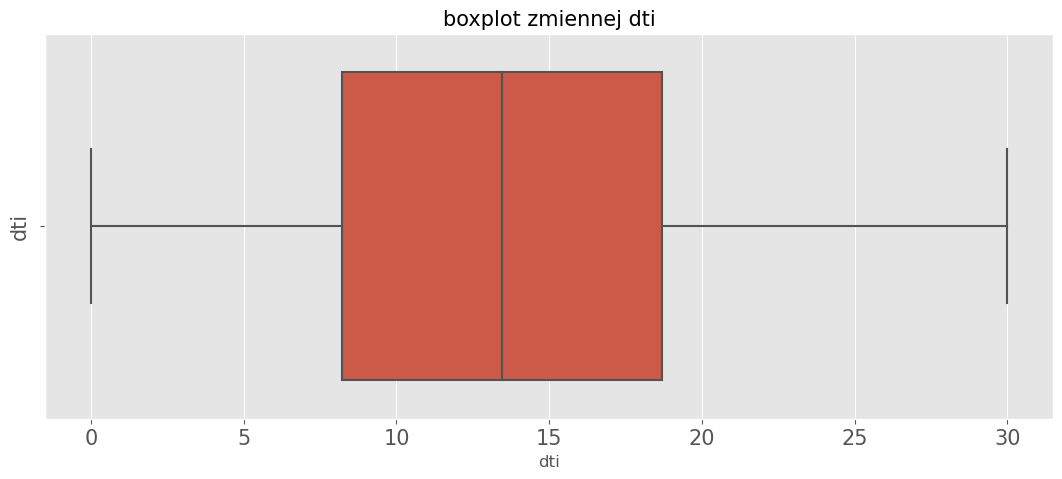

In [166]:
fig, (ax1)=plt.subplots(figsize=(13,5))

#boxplot
sns.boxplot(x='dti',data=df,orient='v',ax=ax1)
ax1.set_ylabel('dti', fontsize=15)
ax1.set_title('boxplot zmiennej dti', fontsize=15)
ax1.tick_params(labelsize=15)

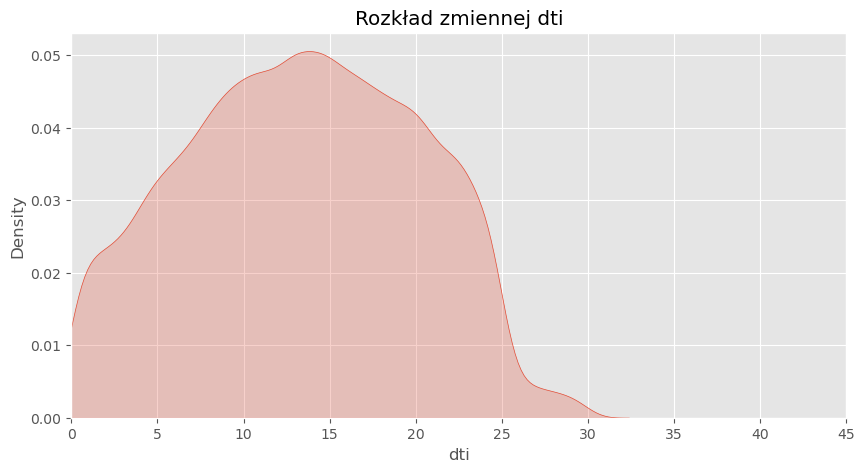

In [167]:
dti = df['dti']
plt.figure(figsize=(10,5))
plt.xlim(0, 45)
plt.title('Rozkład zmiennej dti')
sns.kdeplot(dti , shade=True)
plt.show()

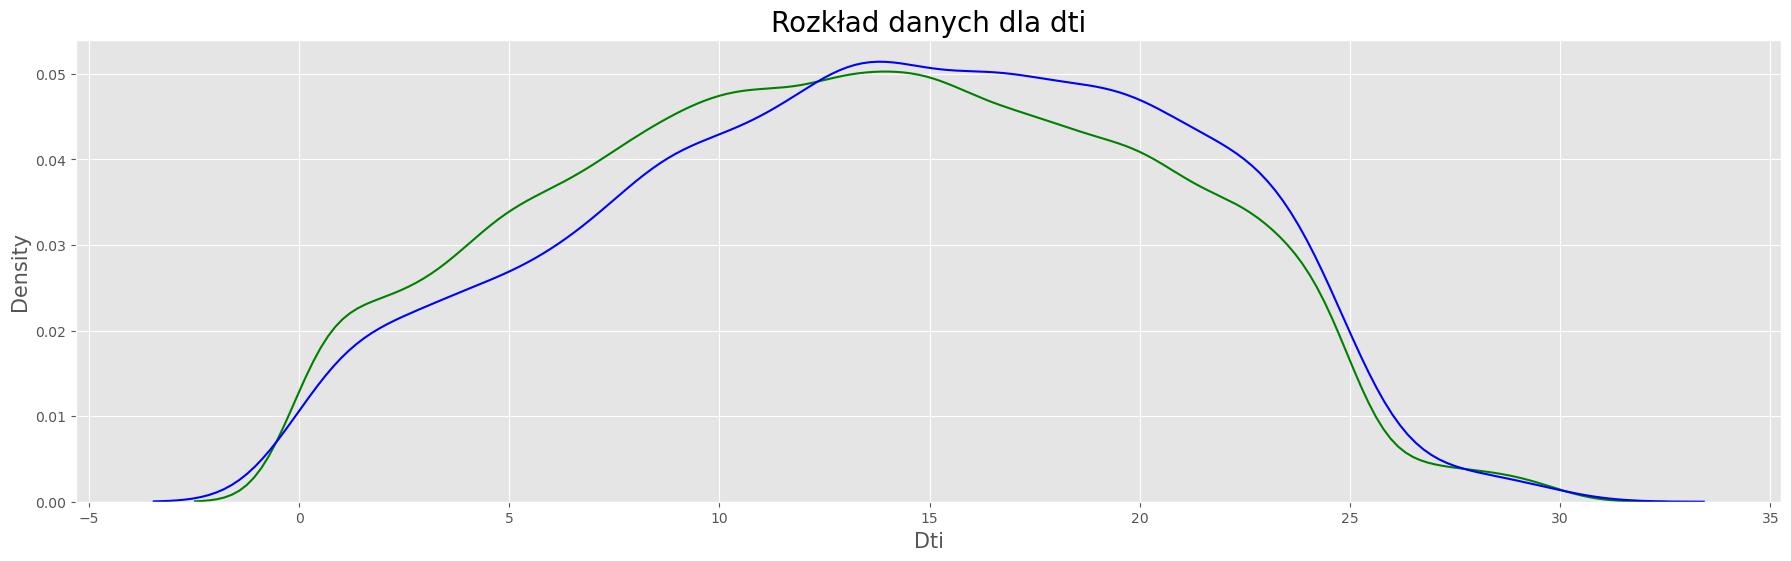

In [168]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['niesplacony_splacony'] == 1, 'dti'], label = 'target = 1', color = 'green')
sns.kdeplot(df.loc[df['niesplacony_splacony'] == 0, 'dti'], label = 'target = 0', color = 'blue');
plt.xlabel('Dti',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Rozkład danych dla dti',fontsize=20);

In [169]:
pd.pivot_table(df, index='niesplacony_splacony', values='dti', aggfunc='mean')

,dti
niesplacony_splacony,
0,14.046
1,13.253


In [170]:
#Osoby niespłacające mają nieznacznie wyższy wskażnik dti - stosunek zobowiązań do dochodów

### LOAN AMOUNT

In [171]:
statystyka(df, 'loan_amnt')

Minimum:  500.0
Maximum:  35000.0
Mean value:  11089.68990972353
Median value:  9700.0
Standard deviation:  7410.8543376499565


In [172]:
kwartyle(df, 'loan_amnt')

1st Quartile (Q1) is:  5200.0
3st Quartile (Q3) is:  15000.0
Interquartile range (IQR) is  9800.0


In [173]:
gorny_dolny_outlier(df, 'loan_amnt', 5200, 15000)

Lower outliers:  -9500.0
Upper outliers:  29700.0


In [174]:
liczba_outlierow(df, 'loan_amnt', 29700, -9500)

Liczba outlierow upper :  1218
Liczba outlierow lower :  0
% outlierow upper:  2.863456836561971 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


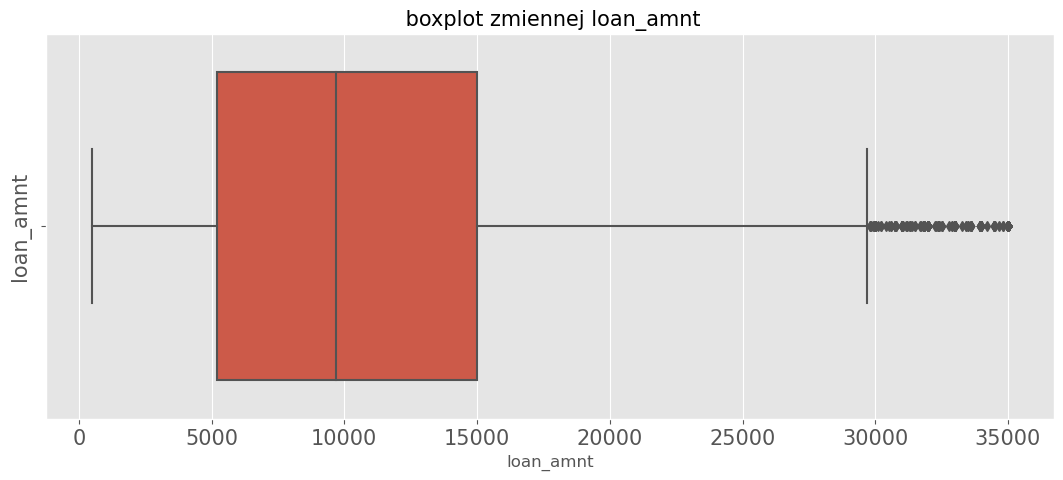

In [175]:
fig, (ax1)=plt.subplots(figsize=(13,5))

#boxplot
sns.boxplot(x='loan_amnt',data=df,orient='v',ax=ax1)
ax1.set_ylabel('loan_amnt', fontsize=15)
ax1.set_title(' boxplot zmiennej loan_amnt', fontsize=15)
ax1.tick_params(labelsize=15)

In [176]:
# W 'loan_amnt' widać outliery powyżej 30000

In [177]:
# Osoby niespłącające kredytów mają wyższe kwoty przydzielonego kredytu

df[['loan_amnt', 'niesplacony_splacony']].groupby(['niesplacony_splacony'], as_index=False).mean().sort_values(by='loan_amnt', ascending=False)

,niesplacony_splacony,loan_amnt
0,0,11837.428
1,1,10956.503


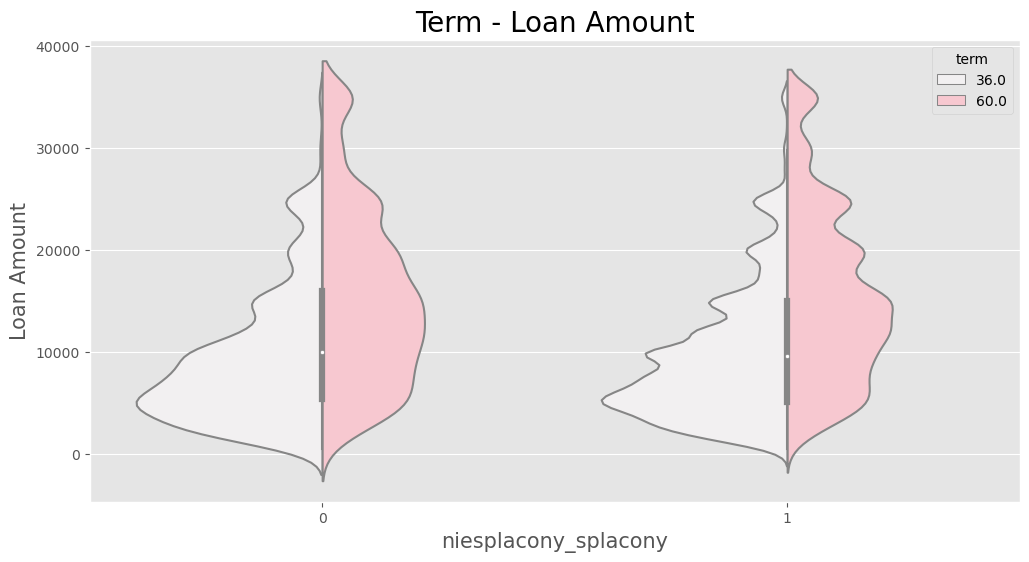

In [178]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="niesplacony_splacony",y="loan_amnt",data=df, hue="term", split=True,color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("niesplacony_splacony", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

In [179]:
#Widać, że osoby zaciągające kredyt na dłyższy okres (60mcy), zadłużają się na wyższe kwoty

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

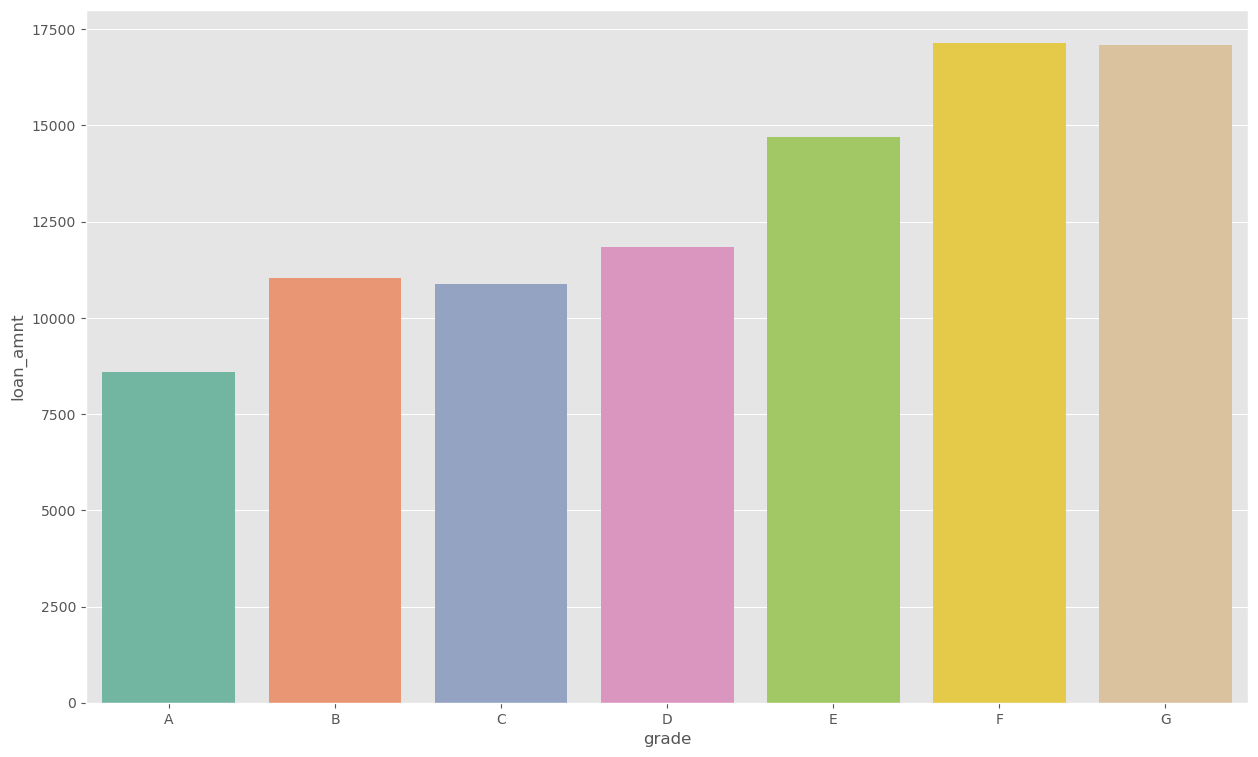

In [180]:
#Chcę sprawdzić, jak wyglądają kwoty kredytu dla poszczólnych grup (zmienna 'grade')

group = df.groupby("grade").mean()
avg_loan = group['loan_amnt'].reset_index()
plt.subplots(figsize=(15,9))
sns.barplot(x='grade', y='loan_amnt', data=avg_loan, palette='Set2')

In [181]:
#Osoby z grupy najwyższego ryzyka (G) zadłużają się na wyższe kwoty. Im wyższa grupa ryzyka, tym większe kwoty kredytu

### INSTALLMENT

In [182]:
statystyka(df, 'installment')

Minimum:  15.67
Maximum:  1305.19
Mean value:  322.6220063005406
Median value:  277.69
Standard deviation:  208.92487412535752


In [183]:
kwartyle(df, 'installment')

1st Quartile (Q1) is:  165.53500000000003
3st Quartile (Q3) is:  428.155
Interquartile range (IQR) is  262.61999999999995


In [184]:
gorny_dolny_outlier(df, 'installment', 165.54, 428.16)

Lower outliers:  -228.39000000000001
Upper outliers:  822.09


In [185]:
liczba_outlierow(df, 'installment', 822, -228.4)

Liczba outlierow upper :  1393
Liczba outlierow lower :  0
% outlierow upper:  3.2748730487116795 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


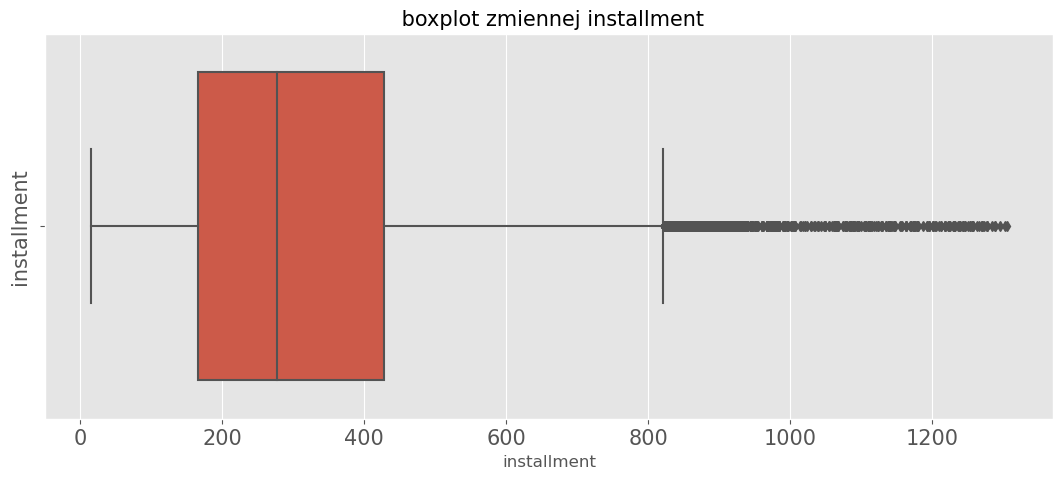

In [186]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='installment',data=df,orient='v',ax=ax1)
ax1.set_ylabel('installment', fontsize=15)
ax1.set_title(' boxplot zmiennej installment', fontsize=15)
ax1.tick_params(labelsize=15)

In [187]:
# Outliery powyżej 800

In [188]:
#Kredytobiorcy, którzy niespłacają kredytów mają nieco wyższe raty kredytu.

pd.pivot_table(df, index='niesplacony_splacony', values="installment", aggfunc='mean')

,installment
niesplacony_splacony,
0,333.065
1,320.762


### INQUIERIES IN THE LAST 6 MONTHS

In [189]:
statystyka(df, 'inq_last_6mths')

Minimum:  0.0
Maximum:  33.0
Mean value:  1.0813663720142939
Median value:  1.0
Standard deviation:  1.5269176123050658


In [190]:
kwartyle(df, 'inq_last_6mths')

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  2.0
Interquartile range (IQR) is  2.0


In [191]:
gorny_dolny_outlier(df, 'inq_last_6mths', 0.0, 2.0)

Lower outliers:  -3.0
Upper outliers:  5.0


In [192]:
liczba_outlierow(df, 'inq_last_6mths', 5.0, -3.0)

Liczba outlierow upper :  781
Liczba outlierow lower :  0
% outlierow upper:  1.836091781079556 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


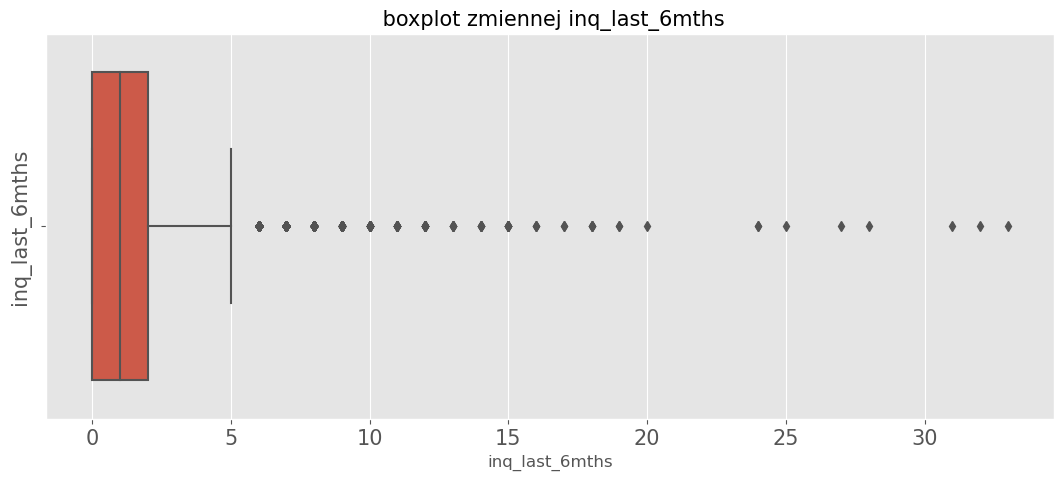

In [193]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='inq_last_6mths',data=df,orient='v',ax=ax1)
ax1.set_ylabel('inq_last_6mths', fontsize=15)
ax1.set_title(' boxplot zmiennej inq_last_6mths', fontsize=15)
ax1.tick_params(labelsize=15)

In [194]:
# Outliersy dla więcej niż 5 składanych wniosków kredytowych

<AxesSubplot:xlabel='grade', ylabel='inq_last_6mths'>

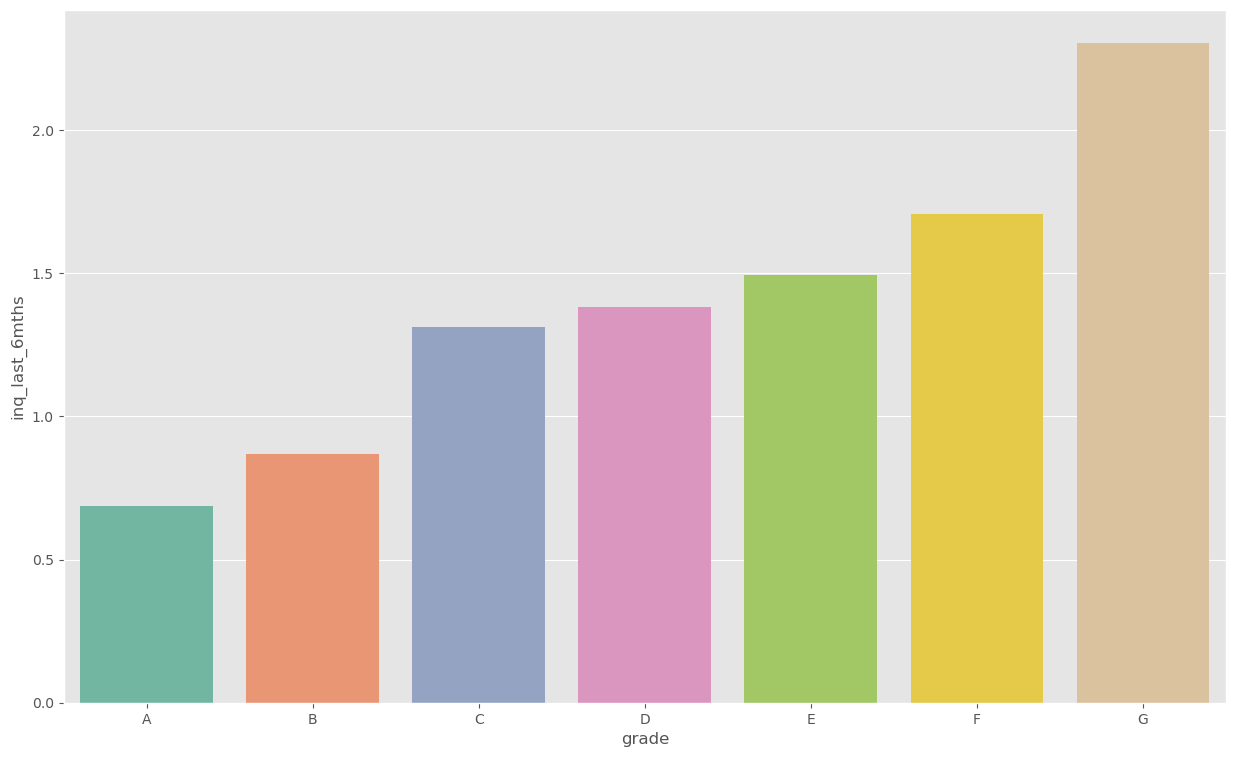

In [195]:
#Chcę sprawdzić, ile wniosków kredytowych składanych jest w poszczególnych grupach (zmienna 'grade')

group = df.groupby("grade").mean()
avg_loan = group['inq_last_6mths'].reset_index()
plt.subplots(figsize=(15,9))
sns.barplot(x='grade', y='inq_last_6mths', data=avg_loan, palette='Set2')

In [196]:
#Im wyższa grupa ryzyka, tym więcej wniosków kredytowych jest składanych

In [197]:
#Osoby częściej składające wnioski o przyznanie kredytu, częściej mają problemy z jego spłatą

pd.pivot_table(df, index='niesplacony_splacony', values='inq_last_6mths', aggfunc='mean')

,inq_last_6mths
niesplacony_splacony,
0,1.483
1,1.010


### FICO_RANGE_HIGH i FICO_RANGE_LOW

In [198]:
df[['fico_range_low','fico_range_high']].describe()

,fico_range_low,fico_range_high
count,42536.000,42536.000
mean,713.052,717.052
std,36.188,36.188
min,610.000,614.000
25%,685.000,689.000
50%,710.000,714.000
75%,740.000,744.000
max,825.000,829.000


In [199]:
#Wyniki dla obywdu zmiennych są bardzo podobne. 
#Sprawdzę korelację pomiędzy nimi

In [200]:
df[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.000,1.000
fico_range_high,1.000,1.000


In [201]:
#Zmienne są silnie skorelowane, więc do analizy potrzebuję tylko jednej. 
#Stworzę nową kolumnę 'fico', która będzie zawierała średnie wartości obydwu

In [202]:
df['fico'] = (df['fico_range_low'] + df['fico_range_high'])/2

In [203]:
df.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

In [204]:
#Osoby niespłącające kredytów mają niższy wskaźnik FICO

pd.pivot_table(df, index='niesplacony_splacony', values='fico', aggfunc='mean')

,fico
niesplacony_splacony,
0,702.884
1,717.220


In [205]:
statystyka(df, 'fico')

Minimum:  612.0
Maximum:  827.0
Mean value:  715.0524731991725
Median value:  712.0
Standard deviation:  36.18801616454543


In [206]:
kwartyle(df, 'fico')

1st Quartile (Q1) is:  687.0
3st Quartile (Q3) is:  742.0
Interquartile range (IQR) is  55.0


In [207]:
gorny_dolny_outlier(df, 'fico',687, 742)

Lower outliers:  604.5
Upper outliers:  824.5


In [208]:
liczba_outlierow(df, 'fico', 824.5, 604.5)

Liczba outlierow upper :  3
Liczba outlierow lower :  0
% outlierow upper:  0.00705284935113786 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


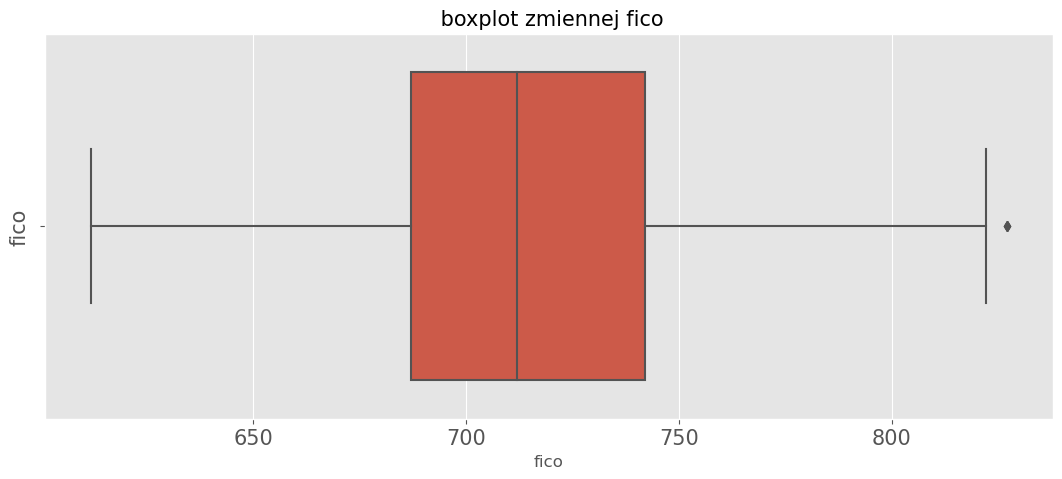

In [209]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='fico',data=df,orient='v',ax=ax1)
ax1.set_ylabel('fico', fontsize=15)
ax1.set_title(' boxplot zmiennej fico', fontsize=15)
ax1.tick_params(labelsize=15)

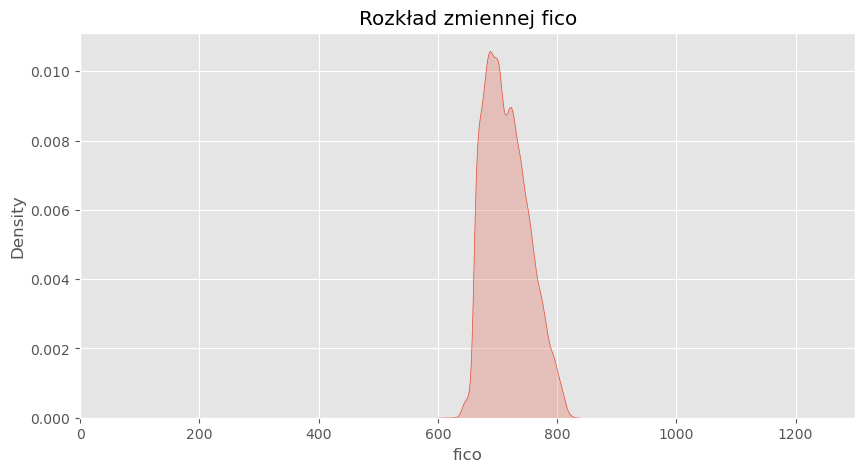

In [210]:
plt.figure(figsize=(10,5))
plt.xlim(0, 1300)
plt.title('Rozkład zmiennej fico')
sns.kdeplot(df['fico'], shade=True)
plt.show()

In [211]:
#Najwyższa gęstość występuje w okolicach 700

In [212]:
df[['fico','int_rate','term']].corr()

,fico,int_rate,term
fico,1.000,-0.703,0.000
int_rate,-0.703,1.000,0.429
term,0.000,0.429,1.000


In [213]:
#Wskaźnik FICO ma wysoką ujemną korelację z wysokością oprocentowania - im wyższy FICO tym niższe oprocentowanie.

## Zmienne kategoryczne

## GRADE

In [214]:
df.groupby(['grade'])['int_rate'].mean()

grade
A   0.073
B   0.110
C   0.135
D   0.156
E   0.174
F   0.193
G   0.205
Name: int_rate, dtype: float64

In [215]:
#Wraz ze wzrostem grupy, wzrasta oprocentowanie kredytu.

In [216]:
pd.pivot_table(df, index="niesplacony_splacony", columns="grade", aggfunc="size")

grade,A,B,C,D,E,F,G
niesplacony_splacony,,,,,,,
0,610,1518,1504,1327,883,416,173
1,9573,10872,7236,4689,2511,885,339


In [217]:
print("% osób spłacających pożyczki w poszczególnych grupach")
print(f"A: {round((9573)/(610+9573) * 100, 2)}%")
print(f"B: {round((10872)/(1518+10872) * 100, 2)}%")
print(f"C: {round((7236)/(1504+7236) * 100, 2)}%")
print(f"D: {round((4689)/(1327+4689) * 100, 2)}%")
print(f"E: {round((2511)/(883+2511) * 100, 2)}%")
print(f"F: {round((885)/(885+416)* 100, 2)}%")
print(f"G: {round((339)/(173+339)* 100, 2)}%")

% osób spłacających pożyczki w poszczególnych grupach
A: 94.01%
B: 87.75%
C: 82.79%
D: 77.94%
E: 73.98%
F: 68.02%
G: 66.21%


In [218]:
#Wraz ze wzrostem grupy ryzyka, wzrasta również odsetek osób niespłacających kredytów

### HOME OWNERSHIP

In [219]:
df['home_ownership'].value_counts()

RENT        20182
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [220]:
#Kategorie 'NONE', 'OTHER' zawierają małe ilości kredytobiorców, 
#dlatego połączę je w jednej kolumnie


df['home_ownership'].replace(['NONE', 'OTHER'], 'OTHERS', inplace=True)

In [221]:
df['home_ownership'].value_counts()

RENT        20182
MORTGAGE    18959
OWN          3251
OTHERS        144
Name: home_ownership, dtype: int64

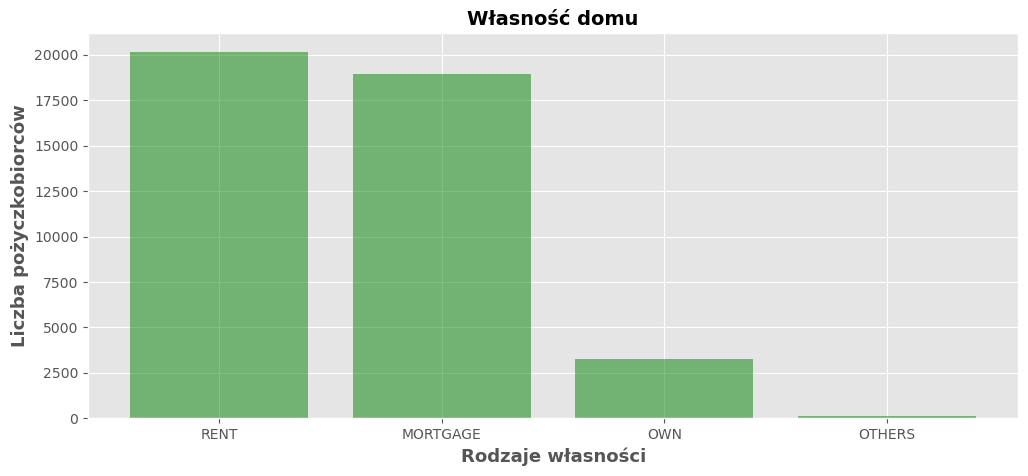

In [222]:
A = df['home_ownership'].value_counts().sort_values(ascending=False)[:5]
f, ax = plt.subplots(figsize=(12,5))
plt.bar(A.index, A.values, color='green', alpha=0.5)
plt.title('Własność domu', fontsize=14.0, fontweight='bold')
plt.xlabel('Rodzaje własności', fontsize=13.0, fontweight='bold')
plt.ylabel("Liczba pożyczkobiorców", fontsize=13.0, fontweight='bold')
plt.show()

In [223]:
#Najwięcej osób biorących kredyty wynajmuje mieszkanie

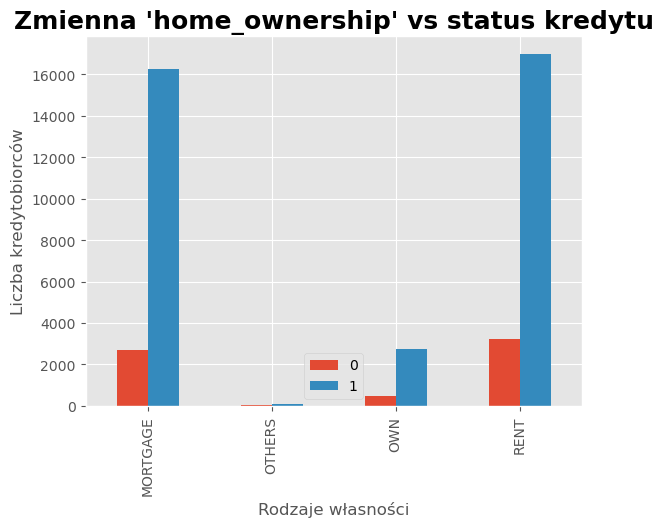

In [224]:
pd.crosstab(df["home_ownership"], df['niesplacony_splacony']).plot(kind="bar")
plt.title("Zmienna 'home_ownership' vs status kredytu", fontsize=18.0, fontweight='bold')
plt.xlabel("Rodzaje własności")
plt.ylabel("Liczba kredytobiorców")
plt.legend(loc="best")
plt.show()

In [225]:
pd.crosstab(df['home_ownership'], df['niesplacony_splacony'])

niesplacony_splacony,0,1
home_ownership,,
MORTGAGE,2699,16260
OTHERS,30,114
OWN,495,2756
RENT,3207,16975


In [226]:
print("% osób spłacających pożyczki w poszczególnych rodzajach własności")
print(f"MORTGAGE: {round((16260)/(2699+16260) * 100, 2)}%")
print(f"OTHERS: {round((114)/(30+114) * 100, 2)}%")
print(f"OWN: {round((2756)/(495+2756) * 100, 2)}%")
print(f"RENT: {round((16975)/(3207+16975) * 100, 2)}%")

% osób spłacających pożyczki w poszczególnych rodzajach własności
MORTGAGE: 85.76%
OTHERS: 79.17%
OWN: 84.77%
RENT: 84.11%


In [227]:
#Osoby spłacające kredyt hipoteczny radzą sobie nieco lepiej niż osoby wynajmujące i posiadające własne domy

In [228]:
#Oprocentowanie z podziałem na poszczególne rodzaje z uwzględnieniem statusu kredytu

pd.crosstab(df['home_ownership'], df['niesplacony_splacony'], values=df['int_rate'], aggfunc='mean')

niesplacony_splacony,0,1
home_ownership,,
MORTGAGE,0.139,0.116
OTHERS,0.139,0.122
OWN,0.138,0.116
RENT,0.139,0.121


In [229]:
#Osoby niespłacające mają wyższe oprocentowanie w każdym rodzaju własności
#Samo oprocentowanie nie różni się zbytnio w poszczególnych rodzajach własności

In [230]:
#Tabela przedstawia wysokość oprocentowania kredytu z podziałem na grupy ('grade') i status pożyczki dla każdego rodzaju własności

A = pd.crosstab(df['grade'],[df['home_ownership'], df['niesplacony_splacony']], values=df['int_rate'], aggfunc='mean')
A

home_ownership       MORTGAGE       OTHERS         OWN        RENT      
niesplacony_splacony        0     1      0     1     0     1     0     1
grade                                                                   
A                       0.075 0.072  0.088 0.085 0.075 0.073 0.077 0.074
B                       0.111 0.110  0.111 0.113 0.111 0.111 0.111 0.110
C                       0.135 0.135  0.127 0.128 0.135 0.136 0.135 0.135
D                       0.156 0.157  0.156 0.144 0.157 0.156 0.157 0.155
E                       0.176 0.175  0.154 0.160 0.177 0.175 0.173 0.172
F                       0.193 0.195  0.168 0.166 0.197 0.191 0.194 0.190
G                       0.201 0.205  0.190 0.189 0.201 0.205 0.208 0.205

In [231]:
#Ta tabela potwierdza tezę, że osoby z wyższej grupy otrzymują wyższe oprocentowanie (rośnie ono wraz ze wzrostem grupy)
#Wysokość oprocentowania nie różni się też mniędzy poszczególnymi rodzajami własności

### PURPOSE

In [232]:
df['purpose'].value_counts().sort_values(ascending=False)

debt_consolidation    19777
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

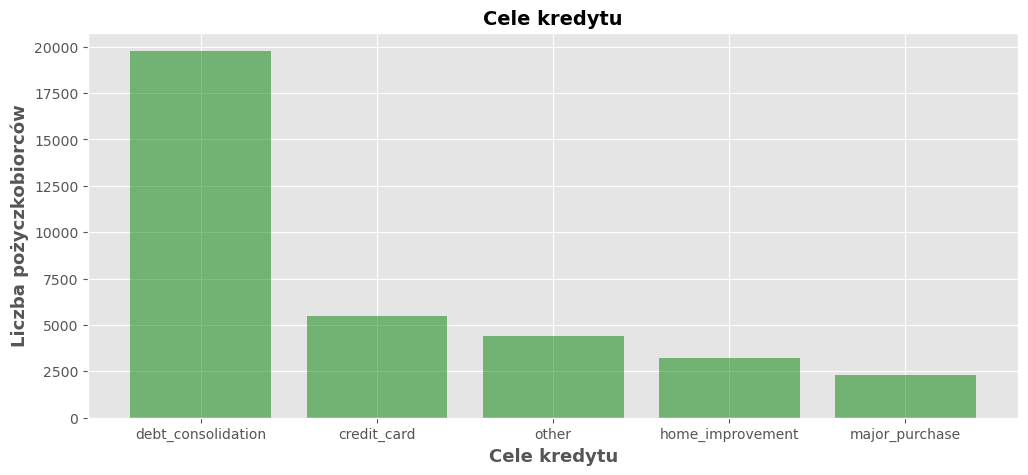

In [233]:
A = df['purpose'].value_counts().sort_values(ascending=False)[:5]
f, ax = plt.subplots(figsize=(12,5))
plt.bar(A.index, A.values, color='green', alpha=0.5)
plt.title('Cele kredytu', fontsize=14.0, fontweight='bold')
plt.xlabel('Cele kredytu', fontsize=13.0, fontweight='bold')
plt.ylabel('Liczba pożyczkobiorców', fontsize=13.0, fontweight='bold')
plt.show()

In [234]:
#Najwięcej osób decyduje się na kredyt konsolidacyjny

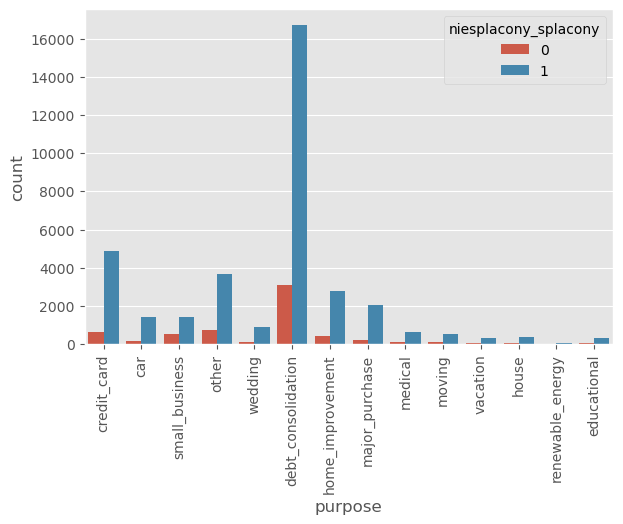

In [235]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='niesplacony_splacony')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [236]:
# Chcę sprawdzić, jaki odsetek kredytów jest spłacany w każdum celu kredytowym

pd.crosstab(df['purpose'], df['niesplacony_splacony'].sort_values(ascending=False))

niesplacony_splacony,0,1
purpose,,
car,173,1442
credit_card,617,4860
debt_consolidation,3084,16693
educational,88,334
home_improvement,422,2777
house,70,356
major_purchase,245,2066
medical,128,625
moving,107,522


In [237]:
print("% osób spłacających pożyczki w poszczególnych grupach")
print(f"car: {round((1442)/(173+1442) * 100, 2)}%")
print(f"credit_card: {round((4860)/(617+4860) * 100, 2)}%")
print(f"debt_consolidation: {round((16693)/(3084+16693) * 100, 2)}%")
print(f"educational: {round((334)/(88+334) * 100, 2)}%")
print(f"home_improvement: {round((2777)/(422+2777) * 100, 2)}%")
print(f"house: {round((356)/(70+356)* 100, 2)}%")
print(f"major_purchase: {round((339)/(173+339)* 100, 2)}%")
print(f"medical: {round((625)/(128+625) * 100, 2)}%")
print(f"moving: {round((522)/(522+107) * 100, 2)}%")
print(f"other: {round((3667)/(758+3667) * 100, 2)}%")
print(f"renewable_energy: {round((86)/(20+86) * 100, 2)}%")
print(f"small_business: {round((1441)/(551+1441) * 100, 2)}%")
print(f"vacation: {round((341)/(59+341)* 100, 2)}%")
print(f"wedding: {round((895)/(109+895)* 100, 2)}%")

% osób spłacających pożyczki w poszczególnych grupach
car: 89.29%
credit_card: 88.73%
debt_consolidation: 84.41%
educational: 79.15%
home_improvement: 86.81%
house: 83.57%
major_purchase: 66.21%
medical: 83.0%
moving: 82.99%
other: 82.87%
renewable_energy: 81.13%
small_business: 72.34%
vacation: 85.25%
wedding: 89.14%


In [238]:
#Spłacalność kredytów jest podobna dla różnych celów kredytowych (z wyjątkiem 'major_purchase' i 'small_business')
#Wydaje mi się, że ta zmnienna nie będzie miała dużego znaczenia w predykcji

### TERM

In [239]:
pd.crosstab(df['term'], df['niesplacony_splacony'])

niesplacony_splacony,0,1
term,,
36.000,3876,27659
60.000,2555,8446


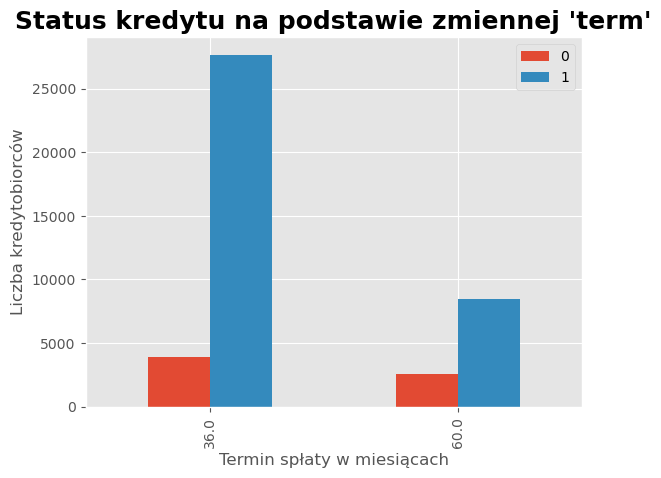

In [240]:
pd.crosstab(df['term'], df['niesplacony_splacony']).plot(kind="bar")
plt.title("Status kredytu na podstawie zmiennej 'term'", fontsize=18.0, fontweight='bold')
plt.xlabel("Termin spłaty w miesiącach")
plt.ylabel("Liczba kredytobiorców")
plt.legend(loc="best")
plt.show()

In [241]:
#Chcę sprawdzić, jak wygląda spłacalność kredytu dla obu wartości

In [242]:
print("% osób niespłacających pożyczki - 36mcy")
print(f"car: {round((3876)/(3876+27659) * 100, 2)}%")

% osób niespłacających pożyczki - 36mcy
car: 12.29%


In [243]:
print("% osób niespłacających pożyczki - 60mcy")
print(f"car: {round((2555)/(2555+8446) * 100, 2)}%")

% osób niespłacających pożyczki - 60mcy
car: 23.23%


In [244]:
#Osoby z dłuższym terminem płatności częściej nie spłacają pożyczek

### 1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

In [245]:
#Osoby niespłącające kredytów (0) mają niższy wskaźnik FICO

In [246]:
pd.pivot_table(df, index='niesplacony_splacony', values='fico', aggfunc='mean')

,fico
niesplacony_splacony,
0,702.884
1,717.220


### 2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO?


In [247]:
pd.crosstab(df['earliest_cr_line'],[df['niesplacony_splacony']])

niesplacony_splacony,0,1
earliest_cr_line,,
1946.000,0,1
1950.000,0,1
1954.000,0,2
1956.000,0,1
1959.000,0,2
1961.000,0,2
1962.000,2,3
1963.000,2,10
1964.000,0,9


In [248]:
#Obliczam, jaki jest odsetek nie- i spłaconych pożyczek dla każdego roku

df_percent = pd.crosstab(df['earliest_cr_line'],df['niesplacony_splacony'],
                         normalize = 'index').rename_axis(None) 

df_percent *= 100

In [249]:
df_percent

niesplacony_splacony,0,1
1946.000,0.000,100.000
1950.000,0.000,100.000
1954.000,0.000,100.000
1956.000,0.000,100.000
1959.000,0.000,100.000
1961.000,0.000,100.000
1962.000,40.000,60.000
1963.000,16.667,83.333
1964.000,0.000,100.000
1965.000,11.111,88.889


In [250]:
#Najwcześniej otwarte historie kredytowe mają 100% spłacalność. Jest ich kilka, więc nie wyznaczają trendu, ponieważ 
#od ok 1965 spłacalność waha się między 80 a 90%

In [251]:
#Korelacja zmiennej'earliest_cr_line' ze zmiennymi FICO jest jedną z najlepszych korelacji zmiennej 'earliest_cr_line'.
#Są one skorelowanie ujemnie - czyli im poźniejszy rok powstania historii kredytowej, tym wskaźniki FICO będą niższe.
#Im niższy wskaźnik FICO, tym większe ryzyko kredytowe
#Długość historii kredytowej nie wykazuje takiej zależności

df.corr()['earliest_cr_line'].sort_values()

total_acc              -0.387
revol_bal              -0.240
open_acc               -0.236
fico                   -0.235
loan_amnt              -0.191
annual_inc             -0.189
installment            -0.169
pub_rec_bankruptcies   -0.058
dti                    -0.055
pub_rec                -0.052
term                   -0.047
niesplacony_splacony   -0.020
inq_last_6mths          0.004
verification_status2    0.026
revol_util              0.041
int_rate                0.116
earliest_cr_line        1.000
Name: earliest_cr_line, dtype: float64

### 3. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

In [252]:
#Z analizy wynika, że osoby spłacające kredyt hipoteczny mają najwyższy odsetek spłaconych kredytów 
#dla wszystkich grup zmiennej 'home_ownership'

In [253]:
print("% osób spłacających pożyczki w poszczególnych rodzajach własności")
print(f"MORTGAGE: {round((16260)/(2699+16260) * 100, 2)}%")
print(f"OTHERS: {round((114)/(30+114) * 100, 2)}%")
print(f"OWN: {round((2756)/(495+2756) * 100, 2)}%")
print(f"RENT: {round((16975)/(3207+16975) * 100, 2)}%")

% osób spłacających pożyczki w poszczególnych rodzajach własności
MORTGAGE: 85.76%
OTHERS: 79.17%
OWN: 84.77%
RENT: 84.11%


### 4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [254]:
#Osoby niespłącające kredytów mają średnio niższy roczny dochód

In [255]:
pd.pivot_table(df, index='niesplacony_splacony', values="annual_inc", aggfunc='mean')

,annual_inc
niesplacony_splacony,
0,63366.871
1,70162.845


### 5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [256]:
#Chcę sprawdzić, czy długość zatrudnienia wpływa na spłatę kredytu.

In [257]:
for rok_pracy in df.emp_length.unique():
    print(f"{rok_pracy} lat pracy:")
    print(f"{df[df.emp_length == rok_pracy].niesplacony_splacony.value_counts(normalize=True)}")
    print('==========================================')

10 lat pracy:
1   0.839
0   0.161
Name: niesplacony_splacony, dtype: float64
0 lat pracy:
1   0.852
0   0.148
Name: niesplacony_splacony, dtype: float64
1 lat pracy:
1   0.847
0   0.153
Name: niesplacony_splacony, dtype: float64
3 lat pracy:
1   0.856
0   0.144
Name: niesplacony_splacony, dtype: float64
8 lat pracy:
1   0.851
0   0.149
Name: niesplacony_splacony, dtype: float64
9 lat pracy:
1   0.866
0   0.134
Name: niesplacony_splacony, dtype: float64
4 lat pracy:
1   0.857
0   0.143
Name: niesplacony_splacony, dtype: float64
5 lat pracy:
1   0.853
0   0.147
Name: niesplacony_splacony, dtype: float64
6 lat pracy:
1   0.852
0   0.148
Name: niesplacony_splacony, dtype: float64
2 lat pracy:
1   0.862
0   0.138
Name: niesplacony_splacony, dtype: float64
7 lat pracy:
1   0.843
0   0.157
Name: niesplacony_splacony, dtype: float64
4.0 lat pracy:
1   0.780
0   0.220
Name: niesplacony_splacony, dtype: float64


In [258]:
pd.crosstab(df['emp_length'],[df['niesplacony_splacony']])

niesplacony_splacony,0,1
emp_length,,
4.0,245,868
0,751,4311
1,551,3044
10,1504,7865
2,654,4089
3,630,3734
4,522,3127
5,509,2949
6,352,2023


In [259]:
print("% osób niespłacających pożyczek")
print(f"0: {round((751)/(751+4311) * 100, 2)}%")
print(f"1: {round((551)/(551+3044) * 100, 2)}%")
print(f"2: {round((654)/(654+4089) * 100, 2)}%")
print(f"3: {round((630)/(630+3734) * 100, 2)}%")
print(f"4: {round((767)/(767+3995) * 100, 2)}%")
print(f"5: {round((509)/(509+2949) * 100, 2)}%")
print(f"6: {round((352)/(352+2023) * 100, 2)}%")
print(f"7: {round((295)/(295+1580) * 100, 2)}%")
print(f"8: {round((238)/(238+1354) * 100, 2)}%")
print(f"9: {round((180)/(180+1161) * 100, 2)}%")
print(f"10: {round((1504)/(1504+7865) * 100, 2)}%")

% osób niespłacających pożyczek
0: 14.84%
1: 15.33%
2: 13.79%
3: 14.44%
4: 16.11%
5: 14.72%
6: 14.82%
7: 15.73%
8: 14.95%
9: 13.42%
10: 16.05%


In [260]:
#Wynika z tego, że lata pracy nie wpływają znacząco na spłatę kredytu.
#Rozkład wartości jest bardzo podobny dla wszystkich lat pracy.

#Z tego też względu usuwam tę kolumnę.
df.drop('emp_length', axis=1, inplace=True)

### 6. Jaka wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

In [261]:
#Z poniższej tabeli, jak i z poprzedniej analizy zmiennej wynika, że osoby niespłacające kredytów zadłużają się na wyższe kwoty

In [262]:
pd.pivot_table(df, index='niesplacony_splacony', values='loan_amnt', aggfunc='mean')

,loan_amnt
niesplacony_splacony,
0,11837.428
1,10956.503


# Future engeneering i modelowanie

### Zmienne kategoryczne zamieniam na numeryczne

In [263]:
#Nie chcę powiększać zbioru danych, dlatego decyduję się na użycie metody get_dummies

In [264]:
dummies = ['grade', 'home_ownership', 'purpose']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [265]:
df.shape

(42536, 39)

In [266]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,verification_status2,niesplacony_splacony,fico,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.000,36.000,0.106,162.870,24000.000,27.650,1985.000,1.000,3.000,0.000,13648.000,0.837,9.000,0.000,0,1,737.000,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.000,60.000,0.153,59.830,30000.000,1.000,1999.000,5.000,3.000,0.000,1687.000,0.094,4.000,0.000,0,0,742.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.000,36.000,0.160,84.330,12252.000,8.720,2001.000,2.000,2.000,0.000,2956.000,0.985,10.000,0.000,1,1,737.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.000,36.000,0.135,339.310,49200.000,20.000,1996.000,1.000,10.000,0.000,5598.000,0.210,37.000,0.000,0,1,692.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.000,60.000,0.127,67.790,80000.000,17.940,1996.000,0.000,15.000,0.000,27783.000,0.539,38.000,0.000,0,1,697.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [267]:
df.columns #sprawdzam, czy w nazwach kolumn wysepuje leading space 

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'verification_status2', 'niesplacony_splacony', 'fico', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_OTHERS', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

### OUTLIERSY

In [268]:
df1=df.copy()

In [269]:
df1

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,verification_status2,niesplacony_splacony,fico,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.000,36.000,0.106,162.870,24000.000,27.650,1985.000,1.000,3.000,0.000,13648.000,0.837,9.000,0.000,0,1,737.000,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.000,60.000,0.153,59.830,30000.000,1.000,1999.000,5.000,3.000,0.000,1687.000,0.094,4.000,0.000,0,0,742.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.000,36.000,0.160,84.330,12252.000,8.720,2001.000,2.000,2.000,0.000,2956.000,0.985,10.000,0.000,1,1,737.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.000,36.000,0.135,339.310,49200.000,20.000,1996.000,1.000,10.000,0.000,5598.000,0.210,37.000,0.000,0,1,692.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.000,60.000,0.127,67.790,80000.000,17.940,1996.000,0.000,15.000,0.000,27783.000,0.539,38.000,0.000,0,1,697.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,3500.000,36.000,0.103,113.390,180000.000,10.000,1998.000,1.000,9.000,0.000,0.000,0.497,20.000,0.000,1,1,687.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
42532,1000.000,36.000,0.096,32.110,12000.000,10.000,1998.000,1.000,9.000,0.000,0.000,0.497,20.000,0.000,1,1,697.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
42533,2525.000,36.000,0.093,80.690,110000.000,10.000,1998.000,1.000,9.000,0.000,0.000,0.497,20.000,0.000,1,1,712.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
42534,6500.000,36.000,0.084,204.840,59000.000,4.000,1998.000,1.000,9.000,0.000,0.000,0.497,20.000,0.000,1,1,742.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [270]:
print(f'Liczba outlierow w loan_amnt: ',df1[((df1['loan_amnt'] - df1['loan_amnt'].mean()) / df1['loan_amnt'].std()).abs() >3]['loan_amnt'].count())
print(f'Liczba outlierow w term: ',df1[((df1['term'] - df1['term'].mean()) / df1['term'].std()).abs() >3]['term'].count())
print(f'Liczba outlierow w int_rate: ',df1[((df1['int_rate'] - df1['int_rate'].mean()) / df1['int_rate'].std()).abs() >3]['int_rate'].count())
print(f'Liczba outlierow w installment: ',df1[((df1['installment'] - df1['installment'].mean()) / df1['installment'].std()).abs() >3]['installment'].count())
print(f'Liczba outlierow w annual_inc: ',df1[((df1['annual_inc'] - df1['annual_inc'].mean()) / df1['annual_inc'].std()).abs() >3]['annual_inc'].count())
print(f'Liczba outlierow w dti: ',df1[((df1['dti'] - df1['dti'].mean()) / df1['dti'].std()).abs() >3]['dti'].count())
print(f'Liczba outlierow w inq_last_6mths: ',df1[((df1['inq_last_6mths'] - df1['inq_last_6mths'].mean()) / df1['inq_last_6mths'].std()).abs() >3]['inq_last_6mths'].count())
print(f'Liczba outlierow w open_acc: ',df1[((df1['open_acc'] - df1['open_acc'].mean()) / df1['open_acc'].std()).abs() >3]['open_acc'].count())
print(f'Liczba outlierow w revol_bal: ',df1[((df1['revol_bal'] - df1['revol_bal'].mean()) / df1['revol_bal'].std()).abs() >3]['revol_bal'].count())
print(f'Liczba outlierow w revol_util: ',df1[((df1['revol_util'] - df1['revol_util'].mean()) / df1['revol_util'].std()).abs() >3]['revol_util'].count())
print(f'Liczba outlierow w total_acc: ',df1[((df1['total_acc'] - df1['total_acc'].mean()) / df1['total_acc'].std()).abs() >3]['total_acc'].count())
print(f'Liczba outlierow w fico: ',df1[((df1['fico'] - df1['fico'].mean()) / df1['fico'].std()).abs() >3]['fico'].count())

Liczba outlierow w loan_amnt:  729
Liczba outlierow w term:  0
Liczba outlierow w int_rate:  29
Liczba outlierow w installment:  331
Liczba outlierow w annual_inc:  341
Liczba outlierow w dti:  0
Liczba outlierow w inq_last_6mths:  781
Liczba outlierow w open_acc:  449
Liczba outlierow w revol_bal:  678
Liczba outlierow w revol_util:  0
Liczba outlierow w total_acc:  413
Liczba outlierow w fico:  3


In [271]:
#Usuwam outliery zamieniając je medianą
df1.loc[(df1['fico'] < 604.5) | (df1['fico'] > 824.5), 'fico'] = df1['fico'].median()
df1.loc[(df1['installment'] < -228.4) | (df1['installment'] > 822), 'installment'] = df1['installment'].median()
df1.loc[(df1['dti'] < 4.78) | (df1['dti'] > 13.90), 'dti'] = df1['dti'].median()
df1.loc[(df1['annual_inc'] < -23750) | (df1['annual_inc'] > 146250), 'annual_inc'] = df1['annual_inc'].median()
df1.loc[(df1['int_rate'] < 0.02) | (df1['int_rate'] > 0.224), 'int_rate'] = df1['int_rate'].median()
df1.loc[(df1['loan_amnt'] < 5200) | (df1['loan_amnt'] > 15000), 'loan_amnt'] = df1['loan_amnt'].median()
df1.loc[(df1['inq_last_6mths'] < -3) | (df1['inq_last_6mths'] > 5), 'inq_last_6mths'] = df1['inq_last_6mths'].median()
df1.loc[(df1['open_acc'] < -3) | (df1['open_acc'] > 21), 'open_acc'] = df1['open_acc'].median()
df1.loc[(df1['revol_bal'] < -16787) | (df1['revol_bal'] > 37673), 'revol_bal'] = df1['revol_bal'].median()
df1.loc[(df1['total_acc'] < -11) | (df1['total_acc'] > 53), 'total_acc'] = df1['total_acc'].median()

In [272]:
df1.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,verification_status2,niesplacony_splacony,fico,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,9700.000,36.000,0.106,162.870,24000.000,13.470,1985.000,1.000,3.000,0.000,13648.000,0.837,9.000,0.000,0,1,737.000,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,9700.000,60.000,0.153,59.830,30000.000,13.470,1999.000,5.000,3.000,0.000,1687.000,0.094,4.000,0.000,0,0,742.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9700.000,36.000,0.160,84.330,12252.000,8.720,2001.000,2.000,2.000,0.000,2956.000,0.985,10.000,0.000,1,1,737.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.000,36.000,0.135,339.310,49200.000,13.470,1996.000,1.000,10.000,0.000,5598.000,0.210,37.000,0.000,0,1,692.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,9700.000,60.000,0.127,67.790,80000.000,13.470,1996.000,0.000,15.000,0.000,27783.000,0.539,38.000,0.000,0,1,697.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


## Train-test Split

In [273]:
Y = df1['niesplacony_splacony']
X = df1.drop(['niesplacony_splacony'], axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [274]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

## Standaryzacja

In [275]:
#Dzięki standaryzacji zmienne mogą być między sobą porównywane. 
#Standaryzowana zmienna ma średnią na równą 0 i odchylenie standardowe na równe 1

In [276]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [277]:
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,-0.007,-0.118,-0.081,-0.157,-0.268,0.123,-0.339,0.007,-0.302,-0.047,0.086,0.244,-0.235,-0.043,-0.178,0.121,0.312,-0.102,-0.081,-0.059,-0.036,-0.022,-0.012,-0.058,0.211,0.520,-0.187,-0.020,-0.057,-0.020,-0.048,-0.027,-0.025,-0.068,-0.010,-0.044,-0.019,-0.031
1,-0.006,0.282,0.142,-0.229,-0.188,0.102,0.059,0.581,-0.251,-0.039,-0.169,-0.234,-0.274,-0.036,-0.148,0.124,-0.107,0.328,-0.068,-0.049,-0.030,-0.018,-0.010,-0.048,0.176,-0.064,-0.155,-0.017,-0.048,-0.017,-0.040,-0.022,-0.020,-0.057,-0.008,-0.037,-0.016,-0.026
2,-0.005,-0.087,0.153,-0.181,-0.260,-0.192,0.095,0.132,-0.258,-0.035,-0.126,0.256,-0.159,-0.031,0.166,0.089,-0.094,0.289,-0.060,-0.043,-0.026,-0.016,-0.009,-0.042,0.155,-0.057,-0.137,-0.015,-0.042,-0.015,-0.035,-0.020,-0.018,-0.050,-0.007,0.663,-0.014,-0.023
3,0.023,-0.127,0.079,0.046,-0.093,0.132,-0.018,0.008,0.047,-0.051,-0.117,-0.214,0.312,-0.046,-0.192,-0.137,-0.138,0.424,-0.088,-0.064,-0.038,-0.024,-0.013,-0.062,0.227,-0.083,-0.201,-0.022,-0.062,-0.022,-0.052,-0.029,-0.026,0.633,-0.011,-0.048,-0.021,-0.034
4,-0.006,0.307,0.027,-0.240,0.124,0.111,-0.015,-0.150,0.263,-0.043,0.386,0.031,0.279,-0.039,-0.161,-0.090,0.283,-0.092,-0.074,-0.053,-0.032,-0.020,-0.011,-0.052,0.191,-0.070,-0.169,-0.018,-0.052,-0.018,-0.043,-0.024,-0.022,0.532,-0.009,-0.040,-0.018,-0.028


### Klasteryzacja -   KMeans, Hierarchiczna i DBScan

### KMeans

In [278]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_normalized)

KMeans(max_iter=1000, n_clusters=5)

In [279]:
kmeans.labels_

array([2, 4, 4, ..., 2, 2, 2])

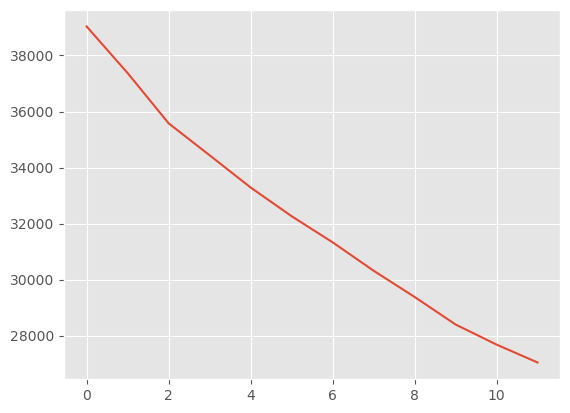

In [280]:
# elbow-curve - chcę sprawdzić optymalną liczbę klastrów

ssd = [] 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_normalized)
    
    ssd.append(kmeans.inertia_) 

plt.plot(ssd)

In [281]:
# Na podstawie wykresu optymalna liczba klastrów to 10
# Aby to potwierdzić wykonam test Silhouette

In [282]:
# Silhouette

range_n_clusters = [8, 9, 10, 11, 12]

for num_clusters in range_n_clusters:
    
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_normalized)
    
    cluster_labels = kmeans.labels_
    
    
    silhouette_avg = silhouette_score(X_normalized, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=8, the silhouette score is 0.10686624098182093
For n_clusters=9, the silhouette score is 0.12407669350107407
For n_clusters=10, the silhouette score is 0.12462141131029955
For n_clusters=11, the silhouette score is 0.14198399014236104
For n_clusters=12, the silhouette score is 0.15296794563491373


In [283]:
# Wg testu Silhouette za optymalną liczbę klastrów przyjmuję 9

In [284]:
# Wyniki nie są jednoznaczne ,więc wykorzystam jeszcze funkcję straty

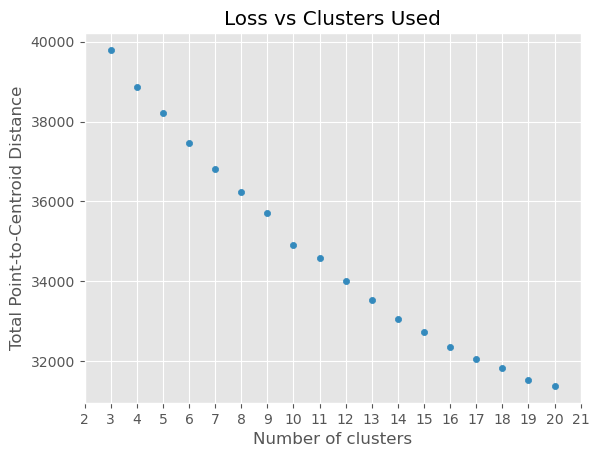

In [285]:
plot_loss_vs_cluster_number(X_normalized, 3, 20, euclidean)

pyplot.show()

In [286]:
# Na powyższym wykresie widać, że odległości pomiędzy klastrami są takie same od 9 wzwyż
# Dlatego też ostatecznie wybieram 9

In [287]:
kmeans = KMeans(n_clusters=9, max_iter=1000, random_state=42)
kmeans.fit(X_normalized)

KMeans(max_iter=1000, n_clusters=9, random_state=42)

In [288]:
kmeans.labels_

array([0, 2, 2, ..., 7, 3, 7])

In [289]:
X_normalized['KMeans_Cluster_ID'] = kmeans.labels_

In [290]:
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,KMeans_Cluster_ID
0,-0.007,-0.118,-0.081,-0.157,-0.268,0.123,-0.339,0.007,-0.302,-0.047,0.086,0.244,-0.235,-0.043,-0.178,0.121,0.312,-0.102,-0.081,-0.059,-0.036,-0.022,-0.012,-0.058,0.211,0.520,-0.187,-0.020,-0.057,-0.020,-0.048,-0.027,-0.025,-0.068,-0.010,-0.044,-0.019,-0.031,0
1,-0.006,0.282,0.142,-0.229,-0.188,0.102,0.059,0.581,-0.251,-0.039,-0.169,-0.234,-0.274,-0.036,-0.148,0.124,-0.107,0.328,-0.068,-0.049,-0.030,-0.018,-0.010,-0.048,0.176,-0.064,-0.155,-0.017,-0.048,-0.017,-0.040,-0.022,-0.020,-0.057,-0.008,-0.037,-0.016,-0.026,2
2,-0.005,-0.087,0.153,-0.181,-0.260,-0.192,0.095,0.132,-0.258,-0.035,-0.126,0.256,-0.159,-0.031,0.166,0.089,-0.094,0.289,-0.060,-0.043,-0.026,-0.016,-0.009,-0.042,0.155,-0.057,-0.137,-0.015,-0.042,-0.015,-0.035,-0.020,-0.018,-0.050,-0.007,0.663,-0.014,-0.023,2
3,0.023,-0.127,0.079,0.046,-0.093,0.132,-0.018,0.008,0.047,-0.051,-0.117,-0.214,0.312,-0.046,-0.192,-0.137,-0.138,0.424,-0.088,-0.064,-0.038,-0.024,-0.013,-0.062,0.227,-0.083,-0.201,-0.022,-0.062,-0.022,-0.052,-0.029,-0.026,0.633,-0.011,-0.048,-0.021,-0.034,7
4,-0.006,0.307,0.027,-0.240,0.124,0.111,-0.015,-0.150,0.263,-0.043,0.386,0.031,0.279,-0.039,-0.161,-0.090,0.283,-0.092,-0.074,-0.053,-0.032,-0.020,-0.011,-0.052,0.191,-0.070,-0.169,-0.018,-0.052,-0.018,-0.043,-0.024,-0.022,0.532,-0.009,-0.040,-0.018,-0.028,7


In [291]:
# Liczebność każdego z klastrów

from collections import Counter
Counter(kmeans.labels_)

Counter({0: 4084,
         2: 5095,
         7: 3684,
         3: 7998,
         4: 4746,
         6: 5357,
         5: 5132,
         1: 4403,
         8: 2037})

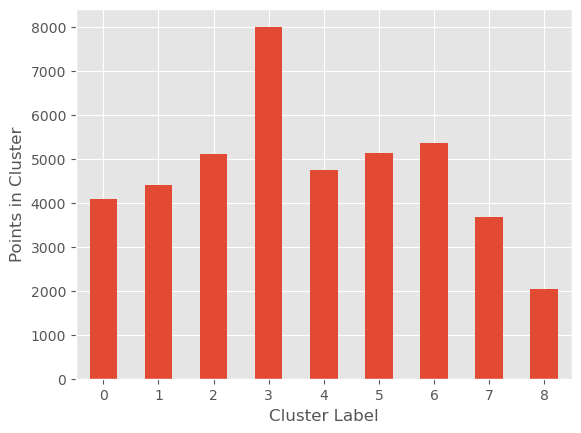

In [292]:
plot_cluster_cardinality(kmeans.labels_)

pyplot.show()

In [293]:
# Cardinality pokazuje, jak liczebne są poszczególne klastry - widać, że klastry 0, 4 i 5 jest dużo bardziej liczebne niż pozostałe.  
# Klastry nie są zbalansowane

In [294]:
pd.crosstab(X_normalized['KMeans_Cluster_ID'], df['niesplacony_splacony'], values=df['fico'], aggfunc='mean')

niesplacony_splacony,0,1
KMeans_Cluster_ID,,
0,717.532,723.377
1,722.201,726.331
2,701.086,698.144
3,731.026,743.781
4,678.174,679.153
5,687.925,686.155
6,736.086,739.209
7,707.821,722.510
8,687.521,695.365


In [295]:
# Klaster 0, 1, 3 i 6 mają niższe wartości wskaźnika 'fico'

In [296]:
pd.pivot_table(df1, index=X_normalized['KMeans_Cluster_ID'], aggfunc='mean')

,annual_inc,dti,earliest_cr_line,fico,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,inq_last_6mths,installment,int_rate,loan_amnt,niesplacony_splacony,open_acc,pub_rec,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,revol_bal,revol_util,term,total_acc,verification_status2
KMeans_Cluster_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,62778.023,12.045,1996.089,722.879,0.394,0.262,0.006,0.000,0.000,0.000,0.000,0.057,0.503,0.763,314.077,0.105,9789.165,0.915,9.643,0.006,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12558.384,0.519,39.062,22.603,0.480
1,45119.594,11.826,1999.545,725.911,0.577,0.000,0.000,0.000,0.000,0.000,0.000,0.048,0.756,0.628,224.507,0.094,8939.144,0.898,7.630,0.001,0.000,0.000,0.936,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,6862.638,0.431,37.951,16.348,0.573
2,59306.882,12.206,1997.674,698.634,0.000,1.000,0.000,0.000,0.000,0.000,0.001,0.062,0.545,1.169,317.760,0.136,9861.541,0.834,9.142,0.003,0.000,0.000,0.751,0.009,0.040,0.004,0.037,0.017,0.015,0.000,0.000,0.046,0.007,0.030,11355.140,0.600,42.849,20.826,0.421
3,62019.296,11.558,1995.836,742.352,0.397,0.125,0.014,0.001,0.001,0.003,0.013,0.111,0.334,0.961,250.559,0.096,9474.119,0.890,8.649,0.008,0.000,0.001,0.017,0.034,0.274,0.035,0.206,0.057,0.050,0.003,0.011,0.118,0.036,0.072,6549.237,0.284,40.315,21.422,0.494
4,66448.361,12.168,1997.274,678.884,0.000,0.000,0.000,0.657,0.250,0.094,0.003,0.065,0.481,1.164,377.641,0.180,10027.629,0.725,9.155,0.018,0.000,0.104,0.549,0.011,0.063,0.012,0.033,0.016,0.012,0.077,0.002,0.079,0.004,0.021,12062.398,0.680,51.332,21.839,0.280
5,61692.216,12.105,1997.639,686.527,0.000,0.000,1.000,0.000,0.000,0.000,0.002,0.069,0.534,1.130,321.361,0.156,9946.989,0.789,9.058,0.020,0.000,0.120,0.569,0.009,0.059,0.009,0.048,0.016,0.013,0.038,0.000,0.057,0.005,0.028,11053.736,0.636,44.848,20.695,0.385
6,72648.331,12.090,1993.321,738.904,0.607,0.012,0.001,0.000,0.000,0.000,0.001,0.083,0.277,0.740,401.273,0.097,10694.008,0.909,11.245,0.001,0.000,0.001,0.959,0.000,0.004,0.000,0.001,0.001,0.001,0.003,0.000,0.006,0.000,0.001,14806.123,0.441,41.399,28.326,0.339
7,54590.614,11.860,1997.075,720.301,0.332,0.248,0.103,0.013,0.004,0.003,0.000,0.096,0.544,0.993,211.657,0.111,9428.983,0.850,8.074,0.011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,7205.068,0.420,39.524,18.961,0.577
8,60167.683,11.889,1994.806,693.517,0.287,0.293,0.178,0.108,0.047,0.018,0.003,0.072,0.407,1.136,273.915,0.136,9715.881,0.764,9.303,1.047,0.913,0.131,0.508,0.006,0.088,0.009,0.033,0.023,0.012,0.070,0.002,0.052,0.013,0.013,8717.796,0.566,42.598,21.604,0.460


In [297]:
# Najwyższe zarobki mają klastry 4, 9, 6
# Najniższe: 7, 1, 5

#Najwyższe raty płacą: 2, 4, 5 
#Najniższe: 1, 5, 7

#Najwyższe oprocentowanie: 5, 6, 9
#Najniższe: 4, 7, 8

In [298]:
pd.crosstab(X_normalized['KMeans_Cluster_ID'],[df1['niesplacony_splacony']])

niesplacony_splacony,0,1
KMeans_Cluster_ID,,
0,348,3736
1,448,3955
2,848,4247
3,878,7120
4,1307,3439
5,1081,4051
6,487,4870
7,554,3130
8,480,1557


In [299]:
print("% osób niespłacających pożyczek")
print(f"0: {round((469)/(469+1542) * 100, 2)}%")
print(f"1: {round((589)/(589+3187) * 100, 2)}%")
print(f"2: {round((1308)/(1308+5139) * 100, 2)}%")
print(f"3: {round((958)/(958+3624) * 100, 2)}%")
print(f"4: {round((576)/(576+5434) * 100, 2)}%")
print(f"5: {round((225)/(225+1966) * 100, 2)}%")
print(f"6: {round((780)/(780+2268) * 100, 2)}%")
print(f"7: {round((806)/(806+6670) * 100, 2)}%")
print(f"8: {round((372)/(372+3802) * 100, 2)}%")
print(f"9: {round((348)/(348+2473) * 100, 2)}%")

% osób niespłacających pożyczek
0: 23.32%
1: 15.6%
2: 20.29%
3: 20.91%
4: 9.58%
5: 10.27%
6: 25.59%
7: 10.78%
8: 8.91%
9: 12.34%


In [300]:
# Najwyższy odsetek osób niespłacających kredytów mają klastry 0 i 6. 
# Klastry 4 i 8 mają najniższy odstetek niespłacających

# Nie widzę trendu, który mogłabym wykorzystać w modelowaniu

In [301]:
# Klasteryzacji hierarchicznej i DBScan nie jest w stanie rozwinąć, ponieważ wyskakuje mi błąd - dead kernel
# Miałam w tej sprawie konsultacje z Tomkiem Siarneckim

### Hierarchiczna

### DBSCAN

# Modelowanie

In [302]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Drzewo decyzyjne

In [303]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train , Y_train)

Y_pred=dt_model.predict(X_test)
Y_pred1=dt_model.predict_proba(X_test)

In [304]:
print('Drzewo decyzyjne - dane treningowe:',dt_model.score(X_train,Y_train))
print('Drzewo decyzyjne - dane testowe:',dt_model.score(X_test,Y_test))

acc_dt_model = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_dt_model)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

Drzewo decyzyjne - dane treningowe: 1.0
Drzewo decyzyjne - dane testowe: 0.7492006770735377
Accuracy:  0.7492006770735377
MSE:  0.2507993229264623


In [305]:
results = pd.DataFrame({'Method':['Drzewo decyzyjne'], 'Accuracy': acc_dt_model},index={'1'})
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Drzewo decyzyjne,0.749


### Regresja logistyczna

In [306]:
logit=LogisticRegression()
logit.fit(X_train,Y_train)

Y_pred=logit.predict(X_test)
Y_pred1=logit.predict_proba(X_test)

In [307]:
print('Regraesja logistyczna - dane treningowe:',logit.score(X_train,Y_train))
print('Regraesja logistyczna - dane testowe:',logit.score(X_test,Y_test))

acc_logit = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_logit)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

Regraesja logistyczna - dane treningowe: 0.8495078678452762
Regraesja logistyczna - dane testowe: 0.8467180741019372
Accuracy:  0.8467180741019372
MSE:  0.1532819258980628


In [308]:
results_logit = pd.DataFrame({'Method':['Regresja logistyczna'], 'Accuracy': [acc_logit]},index={'2'})
results = pd.concat([results, results_logit])
results

,Method,Accuracy
1,Drzewo decyzyjne,0.749
2,Regresja logistyczna,0.847


### Random Forest

In [309]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train,Y_train)

Y_pred=random_forest.predict(X_test)
Y_pred1=random_forest.predict_proba(X_test)

In [310]:
print('RandomForest - dane treningowe:',random_forest.score(X_train,Y_train))
print('RandomForest - dane testowe:',random_forest.score(X_test,Y_test))

acc_random_forest = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_random_forest)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

RandomForest - dane treningowe: 1.0
RandomForest - dane testowe: 0.8462478841451947
Accuracy:  0.8462478841451947
MSE:  0.15375211585480533


In [311]:
results_rf = pd.DataFrame({'Method':['RandomForest'], 'Accuracy': acc_random_forest},index={'3'})
results = pd.concat([results, results_rf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Drzewo decyzyjne,0.749
2,Regresja logistyczna,0.847
3,RandomForest,0.846


### Support Vector Machine

In [312]:
model_SVC = SVC(probability=True)
model_SVC.fit(X_train, Y_train)

Y_pred=model_SVC.predict(X_test)
Y_pred1=model_SVC.predict_proba(X_test)

In [313]:
print('SVC - dane treningowe:',model_SVC.score(X_train,Y_train))
print('SVC - dane testowe:',model_SVC.score(X_test,Y_test))

acc_model_SVC = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_SVC)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

SVC - dane treningowe: 0.8495078678452762
SVC - dane testowe: 0.8467180741019372
Accuracy:  0.8467180741019372
MSE:  0.1532819258980628


In [314]:
results_SVC = pd.DataFrame({'Method':['SVC'], 'Accuracy': acc_model_SVC},index={'4'})
results = pd.concat([results, results_SVC])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Drzewo decyzyjne,0.749
2,Regresja logistyczna,0.847
3,RandomForest,0.846
4,SVC,0.847


### XGBoost

In [315]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train,Y_train)

Y_pred=model_XGB.predict(X_test)
Y_pred1=model_XGB.predict_proba(X_test)

In [316]:
print('XGB - dane treningowe:',model_XGB.score(X_train,Y_train))
print('XGB - dane testowe:',model_XGB.score(X_test,Y_test))

acc_model_XGB = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_XGB)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

XGB - dane treningowe: 0.8858692245000314
XGB - dane testowe: 0.8419221365431634
Accuracy:  0.8419221365431634
MSE:  0.15807786345683655


In [317]:
results_XGB = pd.DataFrame({'Method':['XGBoost'], 'Accuracy': acc_model_XGB},index={'5'})
results = pd.concat([results, results_XGB])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Drzewo decyzyjne,0.749
2,Regresja logistyczna,0.847
3,RandomForest,0.846
4,SVC,0.847
5,XGBoost,0.842


### AdaBoost

In [318]:
model_ADA=AdaBoostClassifier()
model_ADA.fit(X_train,Y_train)

Y_pred=model_ADA.predict(X_test)
Y_pred1=model_ADA.predict_proba(X_test)

In [319]:
print('ADA - dane treningowe:',model_ADA.score(X_train,Y_train))
print('ADA - dane testowe:',model_ADA.score(X_test,Y_test))

acc_model_ADA = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_ADA)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

ADA - dane treningowe: 0.8493197918625791
ADA - dane testowe: 0.8458717321798006
Accuracy:  0.8458717321798006
MSE:  0.15412826782019937


In [320]:
results_ADA = pd.DataFrame({'Method':['ADA'], 'Accuracy': acc_model_ADA},index={'6'})
results = pd.concat([results, results_ADA])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Drzewo decyzyjne,0.749
2,Regresja logistyczna,0.847
3,RandomForest,0.846
4,SVC,0.847
5,XGBoost,0.842
6,ADA,0.846


### CatBoost

In [321]:
model_CAT=CatBoostClassifier()
model_CAT.fit(X_train,Y_train)

Y_pred=model_CAT.predict(X_test)
Y_pred1=model_CAT.predict_proba(X_test)

Learning rate set to 0.045192
0:	learn: 0.6630230	total: 190ms	remaining: 3m 9s
1:	learn: 0.6363680	total: 215ms	remaining: 1m 47s
2:	learn: 0.6119908	total: 238ms	remaining: 1m 19s
3:	learn: 0.5909917	total: 260ms	remaining: 1m 4s
4:	learn: 0.5723898	total: 283ms	remaining: 56.4s
5:	learn: 0.5554893	total: 306ms	remaining: 50.7s
6:	learn: 0.5401546	total: 328ms	remaining: 46.6s
7:	learn: 0.5259705	total: 351ms	remaining: 43.5s
8:	learn: 0.5133201	total: 375ms	remaining: 41.3s
9:	learn: 0.5020956	total: 400ms	remaining: 39.6s
10:	learn: 0.4914715	total: 424ms	remaining: 38.1s
11:	learn: 0.4822242	total: 446ms	remaining: 36.7s
12:	learn: 0.4738027	total: 468ms	remaining: 35.5s
13:	learn: 0.4664555	total: 491ms	remaining: 34.6s
14:	learn: 0.4605212	total: 514ms	remaining: 33.7s
15:	learn: 0.4544690	total: 536ms	remaining: 32.9s
16:	learn: 0.4496344	total: 558ms	remaining: 32.3s
17:	learn: 0.4445329	total: 582ms	remaining: 31.7s
18:	learn: 0.4399102	total: 605ms	remaining: 31.2s
19:	learn

167:	learn: 0.3765725	total: 3.56s	remaining: 17.7s
168:	learn: 0.3764328	total: 3.58s	remaining: 17.6s
169:	learn: 0.3763535	total: 3.6s	remaining: 17.6s
170:	learn: 0.3762868	total: 3.62s	remaining: 17.5s
171:	learn: 0.3761895	total: 3.63s	remaining: 17.5s
172:	learn: 0.3760798	total: 3.65s	remaining: 17.4s
173:	learn: 0.3760195	total: 3.66s	remaining: 17.4s
174:	learn: 0.3759384	total: 3.68s	remaining: 17.3s
175:	learn: 0.3758596	total: 3.69s	remaining: 17.3s
176:	learn: 0.3757326	total: 3.71s	remaining: 17.3s
177:	learn: 0.3756973	total: 3.73s	remaining: 17.2s
178:	learn: 0.3756555	total: 3.75s	remaining: 17.2s
179:	learn: 0.3755616	total: 3.76s	remaining: 17.1s
180:	learn: 0.3754584	total: 3.78s	remaining: 17.1s
181:	learn: 0.3753539	total: 3.8s	remaining: 17.1s
182:	learn: 0.3752576	total: 3.81s	remaining: 17s
183:	learn: 0.3751855	total: 3.83s	remaining: 17s
184:	learn: 0.3750926	total: 3.85s	remaining: 16.9s
185:	learn: 0.3750119	total: 3.86s	remaining: 16.9s
186:	learn: 0.3749

334:	learn: 0.3608536	total: 6.76s	remaining: 13.4s
335:	learn: 0.3607529	total: 6.79s	remaining: 13.4s
336:	learn: 0.3606535	total: 6.81s	remaining: 13.4s
337:	learn: 0.3605203	total: 6.83s	remaining: 13.4s
338:	learn: 0.3604107	total: 6.85s	remaining: 13.4s
339:	learn: 0.3603159	total: 6.87s	remaining: 13.3s
340:	learn: 0.3602315	total: 6.89s	remaining: 13.3s
341:	learn: 0.3601644	total: 6.92s	remaining: 13.3s
342:	learn: 0.3600694	total: 6.94s	remaining: 13.3s
343:	learn: 0.3599541	total: 6.96s	remaining: 13.3s
344:	learn: 0.3598807	total: 6.98s	remaining: 13.3s
345:	learn: 0.3597647	total: 7.01s	remaining: 13.2s
346:	learn: 0.3596756	total: 7.03s	remaining: 13.2s
347:	learn: 0.3595652	total: 7.05s	remaining: 13.2s
348:	learn: 0.3594575	total: 7.07s	remaining: 13.2s
349:	learn: 0.3594078	total: 7.09s	remaining: 13.2s
350:	learn: 0.3593259	total: 7.12s	remaining: 13.2s
351:	learn: 0.3592022	total: 7.14s	remaining: 13.1s
352:	learn: 0.3591237	total: 7.16s	remaining: 13.1s
353:	learn: 

494:	learn: 0.3479508	total: 10.3s	remaining: 10.5s
495:	learn: 0.3478703	total: 10.3s	remaining: 10.5s
496:	learn: 0.3477897	total: 10.4s	remaining: 10.5s
497:	learn: 0.3477046	total: 10.4s	remaining: 10.5s
498:	learn: 0.3475896	total: 10.4s	remaining: 10.4s
499:	learn: 0.3475083	total: 10.4s	remaining: 10.4s
500:	learn: 0.3474463	total: 10.4s	remaining: 10.4s
501:	learn: 0.3473264	total: 10.5s	remaining: 10.4s
502:	learn: 0.3472422	total: 10.5s	remaining: 10.4s
503:	learn: 0.3471645	total: 10.5s	remaining: 10.4s
504:	learn: 0.3470788	total: 10.5s	remaining: 10.3s
505:	learn: 0.3469537	total: 10.6s	remaining: 10.3s
506:	learn: 0.3468474	total: 10.6s	remaining: 10.3s
507:	learn: 0.3467600	total: 10.6s	remaining: 10.3s
508:	learn: 0.3466843	total: 10.6s	remaining: 10.3s
509:	learn: 0.3466065	total: 10.7s	remaining: 10.2s
510:	learn: 0.3464972	total: 10.7s	remaining: 10.2s
511:	learn: 0.3463795	total: 10.7s	remaining: 10.2s
512:	learn: 0.3462999	total: 10.7s	remaining: 10.2s
513:	learn: 

661:	learn: 0.3350641	total: 14.1s	remaining: 7.18s
662:	learn: 0.3350133	total: 14.1s	remaining: 7.16s
663:	learn: 0.3349044	total: 14.1s	remaining: 7.14s
664:	learn: 0.3348288	total: 14.1s	remaining: 7.12s
665:	learn: 0.3347737	total: 14.2s	remaining: 7.1s
666:	learn: 0.3347135	total: 14.2s	remaining: 7.08s
667:	learn: 0.3346216	total: 14.2s	remaining: 7.06s
668:	learn: 0.3345662	total: 14.2s	remaining: 7.04s
669:	learn: 0.3344917	total: 14.2s	remaining: 7.01s
670:	learn: 0.3344212	total: 14.3s	remaining: 7s
671:	learn: 0.3343499	total: 14.3s	remaining: 6.97s
672:	learn: 0.3342821	total: 14.3s	remaining: 6.95s
673:	learn: 0.3342054	total: 14.3s	remaining: 6.93s
674:	learn: 0.3341532	total: 14.4s	remaining: 6.91s
675:	learn: 0.3340942	total: 14.4s	remaining: 6.89s
676:	learn: 0.3340101	total: 14.4s	remaining: 6.87s
677:	learn: 0.3339481	total: 14.4s	remaining: 6.85s
678:	learn: 0.3338809	total: 14.4s	remaining: 6.83s
679:	learn: 0.3337865	total: 14.5s	remaining: 6.81s
680:	learn: 0.33

820:	learn: 0.3239171	total: 17.6s	remaining: 3.85s
821:	learn: 0.3238564	total: 17.7s	remaining: 3.82s
822:	learn: 0.3237753	total: 17.7s	remaining: 3.8s
823:	learn: 0.3237130	total: 17.7s	remaining: 3.78s
824:	learn: 0.3236734	total: 17.7s	remaining: 3.76s
825:	learn: 0.3235889	total: 17.7s	remaining: 3.74s
826:	learn: 0.3235361	total: 17.8s	remaining: 3.72s
827:	learn: 0.3234686	total: 17.8s	remaining: 3.69s
828:	learn: 0.3234016	total: 17.8s	remaining: 3.67s
829:	learn: 0.3233122	total: 17.8s	remaining: 3.65s
830:	learn: 0.3232207	total: 17.9s	remaining: 3.63s
831:	learn: 0.3231601	total: 17.9s	remaining: 3.61s
832:	learn: 0.3231077	total: 17.9s	remaining: 3.59s
833:	learn: 0.3230405	total: 17.9s	remaining: 3.57s
834:	learn: 0.3229687	total: 17.9s	remaining: 3.54s
835:	learn: 0.3228910	total: 18s	remaining: 3.52s
836:	learn: 0.3228093	total: 18s	remaining: 3.5s
837:	learn: 0.3227409	total: 18s	remaining: 3.48s
838:	learn: 0.3226976	total: 18s	remaining: 3.45s
839:	learn: 0.3226404	

982:	learn: 0.3135927	total: 20.4s	remaining: 353ms
983:	learn: 0.3135666	total: 20.4s	remaining: 332ms
984:	learn: 0.3135137	total: 20.4s	remaining: 311ms
985:	learn: 0.3134494	total: 20.5s	remaining: 291ms
986:	learn: 0.3133975	total: 20.5s	remaining: 270ms
987:	learn: 0.3133105	total: 20.5s	remaining: 249ms
988:	learn: 0.3132590	total: 20.5s	remaining: 228ms
989:	learn: 0.3132097	total: 20.5s	remaining: 207ms
990:	learn: 0.3131601	total: 20.6s	remaining: 187ms
991:	learn: 0.3130950	total: 20.6s	remaining: 166ms
992:	learn: 0.3130048	total: 20.6s	remaining: 145ms
993:	learn: 0.3129361	total: 20.6s	remaining: 124ms
994:	learn: 0.3128640	total: 20.6s	remaining: 104ms
995:	learn: 0.3128045	total: 20.6s	remaining: 82.9ms
996:	learn: 0.3127505	total: 20.7s	remaining: 62.2ms
997:	learn: 0.3126898	total: 20.7s	remaining: 41.4ms
998:	learn: 0.3126261	total: 20.7s	remaining: 20.7ms
999:	learn: 0.3125837	total: 20.7s	remaining: 0us


In [322]:
print('CAT - dane treningowe:',model_CAT.score(X_train,Y_train))
print('CAT - dane testowe:',model_CAT.score(X_test,Y_test))

acc_model_CAT = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_CAT)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

CAT - dane treningowe: 0.8718575637891042
CAT - dane testowe: 0.8465299981192401
Accuracy:  0.8465299981192401
MSE:  0.15347000188075982


In [323]:
results_CAT = pd.DataFrame({'Method':['CAT'], 'Accuracy': acc_model_CAT},index={'7'})
results = pd.concat([results, results_CAT])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Drzewo decyzyjne,0.749
2,Regresja logistyczna,0.847
3,RandomForest,0.846
4,SVC,0.847
5,XGBoost,0.842
6,ADA,0.846
7,CAT,0.847


### BaggingClassifier

In [324]:
model_bagging=BaggingClassifier()
model_bagging.fit(X_train,Y_train)

Y_pred=model_bagging.predict(X_test)
Y_pred1=model_bagging.predict_proba(X_test)

In [325]:
print('BaggingClassifier - dane treningowe:',model_bagging.score(X_train,Y_train))
print('BaggingClassifier - dane testowe:',model_bagging.score(X_test,Y_test))

acc_model_bagging = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_bagging)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

BaggingClassifier - dane treningowe: 0.9933546486113723
BaggingClassifier - dane testowe: 0.8168139928531126
Accuracy:  0.8168139928531126
MSE:  0.18318600714688735


In [326]:
results_BaggingClassifier = pd.DataFrame({'Method':['BaggingClassifier'], 'Accuracy': acc_model_bagging},index={'8'})
results = pd.concat([results, results_BaggingClassifier])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Drzewo decyzyjne,0.749
2,Regresja logistyczna,0.847
3,RandomForest,0.846
4,SVC,0.847
5,XGBoost,0.842
6,ADA,0.846
7,CAT,0.847
8,BaggingClassifier,0.817


## PCA

In [327]:
pca = PCA(n_components = 0.99)

In [328]:
pca.fit(X_train)

PCA(n_components=0.99)

In [329]:
pca.n_components_

2

In [330]:
pca_train_X = pca.transform(X_train)
pca_test_X = pca.transform(X_train)

### SMOTE 

In [331]:
#Zmienna objaśniana (target) jest niezbalansowana - 85% stanowią spłacone kredyty. 
#Żeby zbalansować dane użyję metody SMOTE (zduplikuje obserwacje z klasy mniejszościowej w zbiorze treningowym)

Counter({0: 9900, 1: 100})


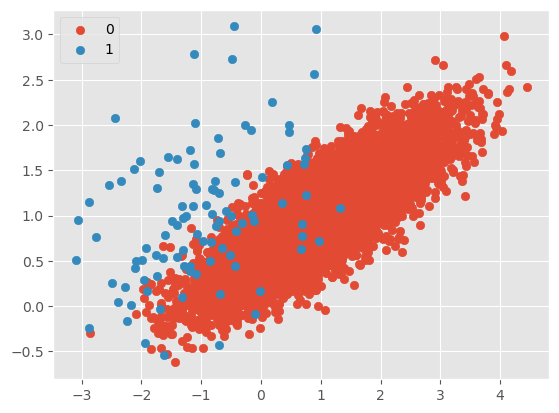

In [332]:
X_train_pca, Y_train_pca = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(Y_train_pca)
print(counter)

for label, _ in counter.items():
    row_ix = where(Y_train_pca == label)[0]
    pyplot.scatter(X_train_pca[row_ix, 0], X_train_pca[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [333]:
#Ten scatter plot przedstawia klasę większościową (czerwoną) oraz rozproszoną klasę mniejszościową (niebieską) 

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


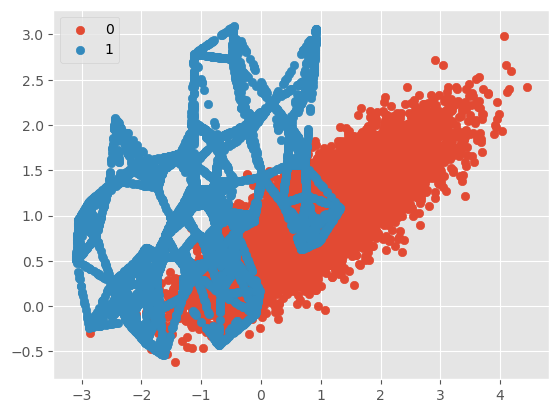

In [334]:
# Oversampluję dane metodą SMOTE


X_train_pca, Y_train_pca = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(Y_train_pca)
print(counter)

oversample = SMOTE()
X_train_smote, Y_train_smote = oversample.fit_resample(X_train_pca, Y_train_pca)

counter = Counter(Y_train_smote)
print(counter)

for label, _ in counter.items():
    row_ix = where(Y_train_smote == label)[0]
    pyplot.scatter(X_train_smote[row_ix, 0], X_train_smote[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [335]:
# Widać dużo większy udział klasy mniejszościowej

In [336]:
# Sprawdzam, jak dane zachowują się po implementacji SMOTE

In [337]:
# drzewo decyzyjne - niezbilansowane dane

X_train_pca, Y_train_pca = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_pca, Y_train_pca, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.769


In [338]:
# drzewo decyzyjne - SMOTE

X_train_smote, Y_train_smote = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train_smote, Y_train_smote, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.822


In [339]:
# Widać znaczną poprawę AUROC dla danych po SMOTE

# Modelowanie na skompresowanych i zbilansowanych danych

In [340]:
def evaluate_performance(y_test, y_pred):
    '''
    Funkcja, która będzie zwracała wartości dokładność, precyzję i recall danego modelu
    '''
    performance_report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = performance_report['accuracy']
    precision = performance_report['1']['precision']
    recall = performance_report['1']['recall']
    
    return {'accuracy': accuracy,
            'precision': precision,
            'recall': recall}

### Drzewo decyzyjne

In [341]:
X_train_smote, X_test, Y_train_smote, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_smote , Y_train_smote)

Y_pred=dt_model.predict(X_test)
Y_pred1=dt_model.predict_proba(X_test)

In [342]:
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [343]:
ns_probs = [0 for _ in range(len(Y_test))]

No Skill: ROC AUC=0.500
DecisionTree: ROC AUC=0.537


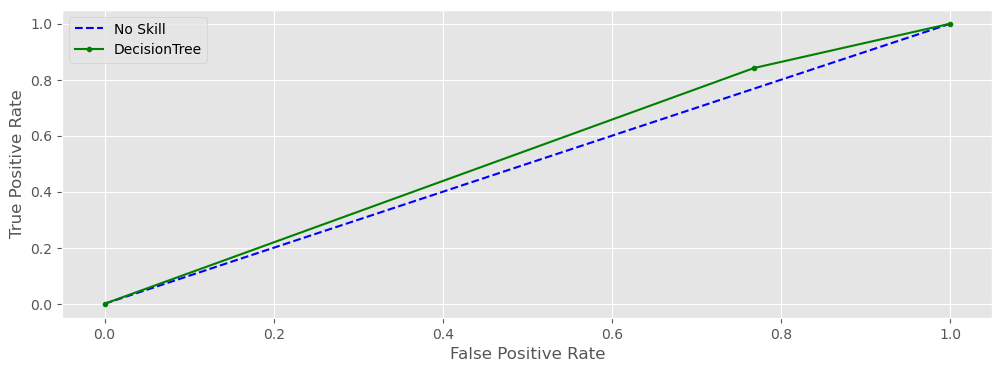

In [344]:
lr_probs = dt_model.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DecisionTree: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='DecisionTree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [345]:
Y_pred = dt_model.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[ 378, 1252],
       [1424, 7580]], dtype=int64)

In [346]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.21      0.23      0.22      1630
           1       0.86      0.84      0.85      9004

    accuracy                           0.75     10634
   macro avg       0.53      0.54      0.54     10634
weighted avg       0.76      0.75      0.75     10634



In [347]:
performance_report = classification_report(Y_test, Y_pred, output_dict=True)

In [348]:
evaluate_performance(Y_test, Y_pred)

{'accuracy': 0.7483543351514012,
 'precision': 0.8582427536231884,
 'recall': 0.8418480675255442}

In [349]:
model_summary = evaluate_performance(Y_test, Y_pred)
model_summary['model'] = dt_model
model_summary['auroc'] = lr_auc

In [350]:
results = pd.DataFrame([model_summary], index={'1'})
results = pd.concat([results])
results

,accuracy,precision,recall,model,auroc
1,0.748,0.858,0.842,DecisionTreeClassifier(),0.537


### Regresja logistyczna

In [351]:
logit=LogisticRegression()
logit.fit(X_train_smote, Y_train_smote)

Y_pred=logit.predict(X_test)
Y_pred1=logit.predict_proba(X_test)

In [352]:
ns_probs = [0 for _ in range(len(Y_test))]

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.660


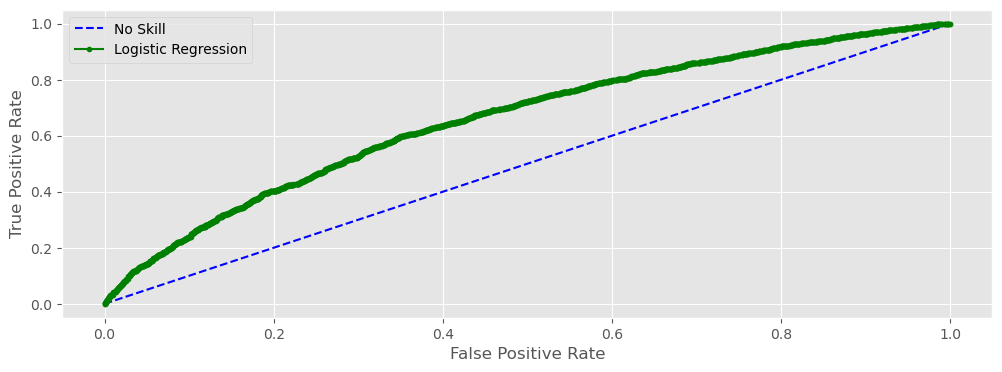

In [353]:
lr_probs = logit.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [354]:
Y_pred = logit.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[   0, 1630],
       [   0, 9004]], dtype=int64)

In [355]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1630
           1       0.85      1.00      0.92      9004

    accuracy                           0.85     10634
   macro avg       0.42      0.50      0.46     10634
weighted avg       0.72      0.85      0.78     10634



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [356]:
performance_report = classification_report(Y_test, Y_pred, output_dict=True)

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [357]:
evaluate_performance(Y_test, Y_pred)

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.8467180741019372,
 'precision': 0.8467180741019372,
 'recall': 1.0}

In [358]:
model_summary = evaluate_performance(Y_test, Y_pred)
model_summary['model'] = logit
model_summary['auroc'] = lr_auc

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [359]:
results_logit = pd.DataFrame([model_summary], index={'2'})
results = pd.concat([results, results_logit])
results

,accuracy,precision,recall,model,auroc
1,0.748,0.858,0.842,DecisionTreeClassifier(),0.537
2,0.847,0.847,1.000,LogisticRegression(),0.660


### Random Forest

In [360]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(X_train_smote, Y_train_smote)

Y_pred=random_forest_model.predict(X_test)
Y_pred1=random_forest_model.predict_proba(X_test)

In [361]:
ns_probs = [0 for _ in range(len(Y_test))]

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.674


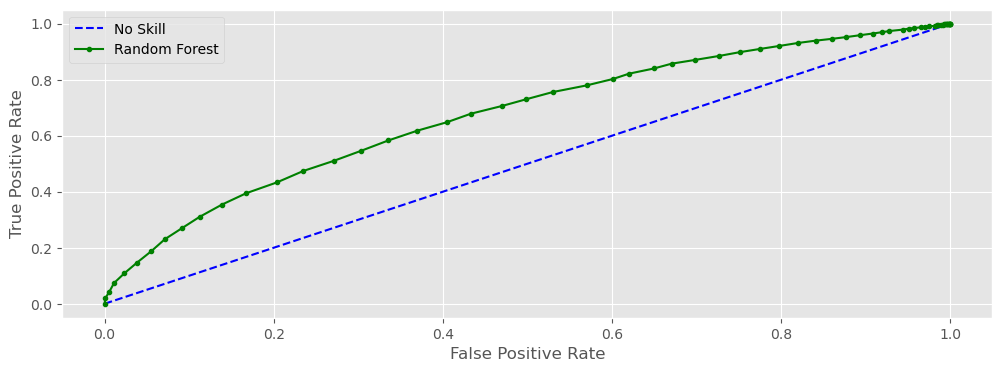

In [362]:
lr_probs = random_forest_model.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [363]:
Y_pred = random_forest_model.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[  18, 1612],
       [  30, 8974]], dtype=int64)

In [364]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.38      0.01      0.02      1630
           1       0.85      1.00      0.92      9004

    accuracy                           0.85     10634
   macro avg       0.61      0.50      0.47     10634
weighted avg       0.78      0.85      0.78     10634



In [365]:
performance_report = classification_report(Y_test, Y_pred, output_dict=True)

In [366]:
evaluate_performance(Y_test, Y_pred)

{'accuracy': 0.8455896182057552,
 'precision': 0.8477234082750803,
 'recall': 0.9966681474900044}

In [367]:
model_summary = evaluate_performance(Y_test, Y_pred)
model_summary['model'] = 'RandomForest'
model_summary['auroc'] = lr_auc

In [368]:
RandomForest = pd.DataFrame([model_summary])

In [369]:
results_random_forest = pd.DataFrame([model_summary], index={'4'})
results = pd.concat([results, results_random_forest])
results

,accuracy,precision,recall,model,auroc
1,0.748,0.858,0.842,DecisionTreeClassifier(),0.537
2,0.847,0.847,1.000,LogisticRegression(),0.660
4,0.846,0.848,0.997,RandomForest,0.674


## Support Vector Machine

In [370]:
model_SVC = SVC(probability=True)
model_SVC.fit(X_train_smote, Y_train_smote)

Y_pred=model_SVC.predict(X_test)
Y_pred1=model_SVC.predict_proba(X_test)

In [371]:
ns_probs = [0 for _ in range(len(Y_test))]

No Skill: ROC AUC=0.500
SVM : ROC AUC=0.527


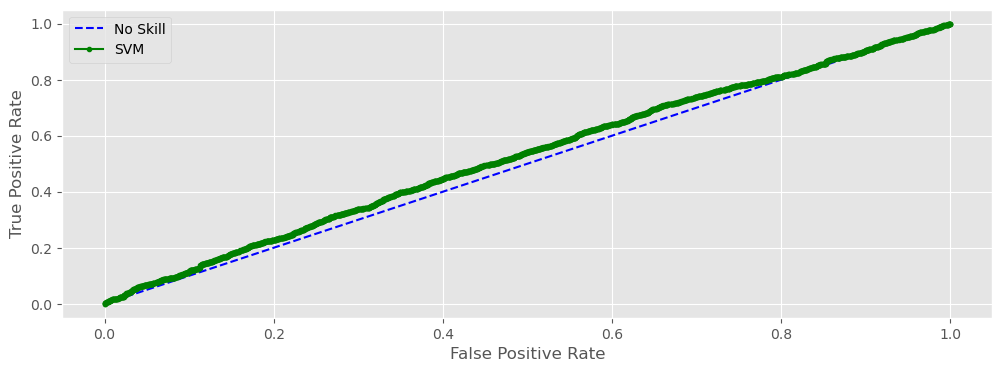

In [372]:
lr_probs = model_SVC.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM : ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVM')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [373]:
Y_pred = model_SVC.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[   0, 1630],
       [   0, 9004]], dtype=int64)

In [374]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1630
           1       0.85      1.00      0.92      9004

    accuracy                           0.85     10634
   macro avg       0.42      0.50      0.46     10634
weighted avg       0.72      0.85      0.78     10634



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [375]:
performance_report = classification_report(Y_test, Y_pred, output_dict=True)

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [376]:
evaluate_performance(Y_test, Y_pred)

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.8467180741019372,
 'precision': 0.8467180741019372,
 'recall': 1.0}

In [377]:
model_summary = evaluate_performance(Y_test, Y_pred)
model_summary['model'] = 'SVM'
model_summary['auroc'] = lr_auc

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [378]:
SVM = pd.DataFrame([model_summary])

In [379]:
results_SVM = pd.DataFrame([model_summary], index={'5'})
results = pd.concat([results, results_SVM])
results

,accuracy,precision,recall,model,auroc
1,0.748,0.858,0.842,DecisionTreeClassifier(),0.537
2,0.847,0.847,1.000,LogisticRegression(),0.660
4,0.846,0.848,0.997,RandomForest,0.674
5,0.847,0.847,1.000,SVM,0.527


### XGBoost

In [380]:
model_XGB=XGBClassifier()
model_XGB.fit(X_train_smote, Y_train_smote)

Y_pred=model_XGB.predict(X_test)
Y_pred1=model_XGB.predict_proba(X_test)

In [381]:
ns_probs = [0 for _ in range(len(Y_test))]

No Skill: ROC AUC=0.500
XGBoost : ROC AUC=0.666


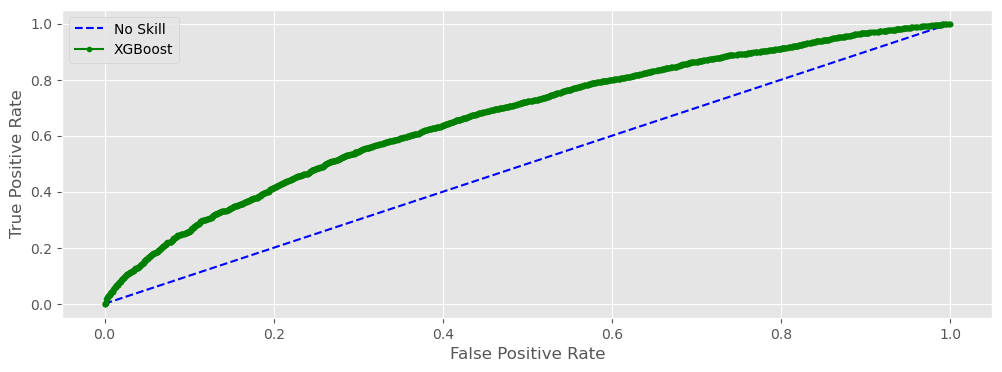

In [382]:
lr_probs = model_XGB.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost : ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [383]:
Y_pred = model_XGB.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[  79, 1551],
       [ 130, 8874]], dtype=int64)

In [384]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.38      0.05      0.09      1630
           1       0.85      0.99      0.91      9004

    accuracy                           0.84     10634
   macro avg       0.61      0.52      0.50     10634
weighted avg       0.78      0.84      0.79     10634



In [385]:
performance_report = classification_report(Y_test, Y_pred, output_dict=True)

In [386]:
evaluate_performance(Y_test, Y_pred)

{'accuracy': 0.8419221365431634,
 'precision': 0.8512230215827338,
 'recall': 0.9855619724566859}

In [387]:
model_summary = evaluate_performance(Y_test, Y_pred)
model_summary['model'] = 'XGBoost'
model_summary['auroc'] = lr_auc

In [388]:
XGBoost = pd.DataFrame([model_summary])

In [389]:
results_XGB = pd.DataFrame([model_summary], index={'5'})
results = pd.concat([results, results_XGB])
results

,accuracy,precision,recall,model,auroc
1,0.748,0.858,0.842,DecisionTreeClassifier(),0.537
2,0.847,0.847,1.000,LogisticRegression(),0.660
4,0.846,0.848,0.997,RandomForest,0.674
5,0.847,0.847,1.000,SVM,0.527
5,0.842,0.851,0.986,XGBoost,0.666


### AdaBoost

In [390]:
model_ADA=AdaBoostClassifier()
model_ADA.fit(X_train_smote, Y_train_smote)

Y_pred=model_ADA.predict(X_test)
Y_pred1=model_ADA.predict_proba(X_test)

In [391]:
ns_probs = [0 for _ in range(len(Y_test))]

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.685


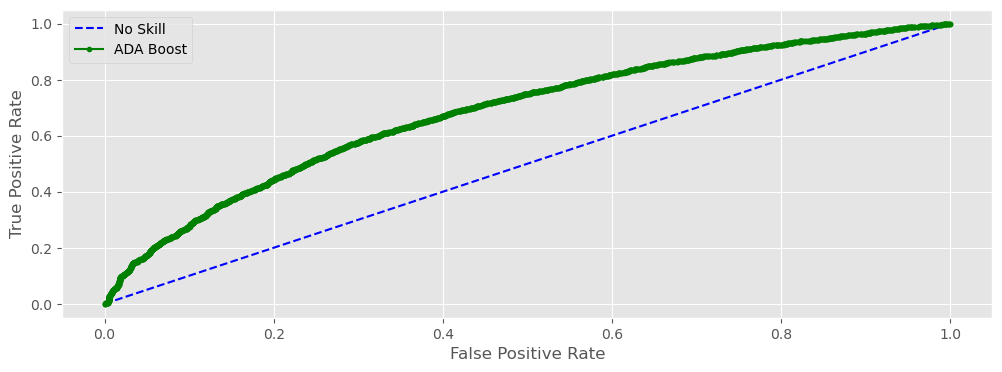

In [392]:
lr_probs = model_ADA.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='ADA Boost')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [393]:
Y_pred = model_ADA.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[  30, 1600],
       [  39, 8965]], dtype=int64)

In [394]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.43      0.02      0.04      1630
           1       0.85      1.00      0.92      9004

    accuracy                           0.85     10634
   macro avg       0.64      0.51      0.48     10634
weighted avg       0.79      0.85      0.78     10634



In [395]:
performance_report = classification_report(Y_test, Y_pred, output_dict=True)

In [396]:
evaluate_performance(Y_test, Y_pred)

{'accuracy': 0.8458717321798006,
 'precision': 0.8485565546616185,
 'recall': 0.9956685917370057}

In [397]:
model_summary = evaluate_performance(Y_test, Y_pred)
model_summary['model'] = 'ADA'
model_summary['auroc'] = lr_auc

In [398]:
ADA = pd.DataFrame([model_summary])

In [399]:
results_model_ADA = pd.DataFrame([model_summary], index={'6'})
results = pd.concat([results, results_model_ADA])
results

,accuracy,precision,recall,model,auroc
1,0.748,0.858,0.842,DecisionTreeClassifier(),0.537
2,0.847,0.847,1.000,LogisticRegression(),0.660
4,0.846,0.848,0.997,RandomForest,0.674
5,0.847,0.847,1.000,SVM,0.527
5,0.842,0.851,0.986,XGBoost,0.666
6,0.846,0.849,0.996,ADA,0.685


### CatBoost

In [400]:
model_CAT=CatBoostClassifier()
model_CAT.fit(X_train_smote, Y_train_smote)

Y_pred=model_CAT.predict(X_test)
Y_pred1=model_CAT.predict_proba(X_test)

Learning rate set to 0.045192
0:	learn: 0.6630230	total: 17.1ms	remaining: 17.1s
1:	learn: 0.6363680	total: 32.1ms	remaining: 16s
2:	learn: 0.6119908	total: 50.1ms	remaining: 16.7s
3:	learn: 0.5909917	total: 71.4ms	remaining: 17.8s
4:	learn: 0.5723898	total: 96ms	remaining: 19.1s
5:	learn: 0.5554893	total: 119ms	remaining: 19.7s
6:	learn: 0.5401546	total: 141ms	remaining: 20s
7:	learn: 0.5259705	total: 163ms	remaining: 20.2s
8:	learn: 0.5133201	total: 187ms	remaining: 20.6s
9:	learn: 0.5020956	total: 211ms	remaining: 20.8s
10:	learn: 0.4914715	total: 227ms	remaining: 20.4s
11:	learn: 0.4822242	total: 247ms	remaining: 20.3s
12:	learn: 0.4738027	total: 269ms	remaining: 20.4s
13:	learn: 0.4664555	total: 293ms	remaining: 20.6s
14:	learn: 0.4605212	total: 316ms	remaining: 20.7s
15:	learn: 0.4544690	total: 339ms	remaining: 20.8s
16:	learn: 0.4496344	total: 363ms	remaining: 21s
17:	learn: 0.4445329	total: 384ms	remaining: 21s
18:	learn: 0.4399102	total: 407ms	remaining: 21s
19:	learn: 0.43578

169:	learn: 0.3763535	total: 3.66s	remaining: 17.9s
170:	learn: 0.3762868	total: 3.68s	remaining: 17.8s
171:	learn: 0.3761895	total: 3.7s	remaining: 17.8s
172:	learn: 0.3760798	total: 3.72s	remaining: 17.8s
173:	learn: 0.3760195	total: 3.74s	remaining: 17.8s
174:	learn: 0.3759384	total: 3.76s	remaining: 17.7s
175:	learn: 0.3758596	total: 3.78s	remaining: 17.7s
176:	learn: 0.3757326	total: 3.81s	remaining: 17.7s
177:	learn: 0.3756973	total: 3.83s	remaining: 17.7s
178:	learn: 0.3756555	total: 3.85s	remaining: 17.6s
179:	learn: 0.3755616	total: 3.87s	remaining: 17.6s
180:	learn: 0.3754584	total: 3.89s	remaining: 17.6s
181:	learn: 0.3753539	total: 3.91s	remaining: 17.6s
182:	learn: 0.3752576	total: 3.93s	remaining: 17.6s
183:	learn: 0.3751855	total: 3.96s	remaining: 17.6s
184:	learn: 0.3750926	total: 3.98s	remaining: 17.5s
185:	learn: 0.3750119	total: 4s	remaining: 17.5s
186:	learn: 0.3749112	total: 4.02s	remaining: 17.5s
187:	learn: 0.3748262	total: 4.04s	remaining: 17.4s
188:	learn: 0.37

328:	learn: 0.3614100	total: 6.45s	remaining: 13.1s
329:	learn: 0.3613260	total: 6.46s	remaining: 13.1s
330:	learn: 0.3612276	total: 6.48s	remaining: 13.1s
331:	learn: 0.3611156	total: 6.5s	remaining: 13.1s
332:	learn: 0.3610636	total: 6.53s	remaining: 13.1s
333:	learn: 0.3609701	total: 6.55s	remaining: 13.1s
334:	learn: 0.3608536	total: 6.57s	remaining: 13s
335:	learn: 0.3607529	total: 6.59s	remaining: 13s
336:	learn: 0.3606535	total: 6.62s	remaining: 13s
337:	learn: 0.3605203	total: 6.64s	remaining: 13s
338:	learn: 0.3604107	total: 6.67s	remaining: 13s
339:	learn: 0.3603159	total: 6.69s	remaining: 13s
340:	learn: 0.3602315	total: 6.71s	remaining: 13s
341:	learn: 0.3601644	total: 6.73s	remaining: 12.9s
342:	learn: 0.3600694	total: 6.75s	remaining: 12.9s
343:	learn: 0.3599541	total: 6.76s	remaining: 12.9s
344:	learn: 0.3598807	total: 6.78s	remaining: 12.9s
345:	learn: 0.3597647	total: 6.79s	remaining: 12.8s
346:	learn: 0.3596756	total: 6.81s	remaining: 12.8s
347:	learn: 0.3595652	total

494:	learn: 0.3479508	total: 9.83s	remaining: 10s
495:	learn: 0.3478703	total: 9.85s	remaining: 10s
496:	learn: 0.3477897	total: 9.87s	remaining: 9.99s
497:	learn: 0.3477046	total: 9.89s	remaining: 9.97s
498:	learn: 0.3475896	total: 9.91s	remaining: 9.96s
499:	learn: 0.3475083	total: 9.94s	remaining: 9.94s
500:	learn: 0.3474463	total: 9.96s	remaining: 9.92s
501:	learn: 0.3473264	total: 9.98s	remaining: 9.9s
502:	learn: 0.3472422	total: 10s	remaining: 9.89s
503:	learn: 0.3471645	total: 10s	remaining: 9.87s
504:	learn: 0.3470788	total: 10.1s	remaining: 9.85s
505:	learn: 0.3469537	total: 10.1s	remaining: 9.83s
506:	learn: 0.3468474	total: 10.1s	remaining: 9.81s
507:	learn: 0.3467600	total: 10.1s	remaining: 9.8s
508:	learn: 0.3466843	total: 10.1s	remaining: 9.78s
509:	learn: 0.3466065	total: 10.2s	remaining: 9.77s
510:	learn: 0.3464972	total: 10.2s	remaining: 9.75s
511:	learn: 0.3463795	total: 10.2s	remaining: 9.73s
512:	learn: 0.3462999	total: 10.2s	remaining: 9.71s
513:	learn: 0.3462395	

656:	learn: 0.3354060	total: 13.3s	remaining: 6.92s
657:	learn: 0.3353637	total: 13.3s	remaining: 6.91s
658:	learn: 0.3352991	total: 13.3s	remaining: 6.88s
659:	learn: 0.3352017	total: 13.3s	remaining: 6.87s
660:	learn: 0.3350991	total: 13.3s	remaining: 6.85s
661:	learn: 0.3350641	total: 13.4s	remaining: 6.83s
662:	learn: 0.3350133	total: 13.4s	remaining: 6.81s
663:	learn: 0.3349044	total: 13.4s	remaining: 6.79s
664:	learn: 0.3348288	total: 13.4s	remaining: 6.77s
665:	learn: 0.3347737	total: 13.5s	remaining: 6.75s
666:	learn: 0.3347135	total: 13.5s	remaining: 6.73s
667:	learn: 0.3346216	total: 13.5s	remaining: 6.71s
668:	learn: 0.3345662	total: 13.5s	remaining: 6.69s
669:	learn: 0.3344917	total: 13.5s	remaining: 6.67s
670:	learn: 0.3344212	total: 13.6s	remaining: 6.64s
671:	learn: 0.3343499	total: 13.6s	remaining: 6.63s
672:	learn: 0.3342821	total: 13.6s	remaining: 6.61s
673:	learn: 0.3342054	total: 13.6s	remaining: 6.59s
674:	learn: 0.3341532	total: 13.6s	remaining: 6.57s
675:	learn: 

815:	learn: 0.3241769	total: 16.5s	remaining: 3.72s
816:	learn: 0.3241255	total: 16.5s	remaining: 3.7s
817:	learn: 0.3240895	total: 16.5s	remaining: 3.67s
818:	learn: 0.3240210	total: 16.5s	remaining: 3.65s
819:	learn: 0.3239753	total: 16.6s	remaining: 3.63s
820:	learn: 0.3239171	total: 16.6s	remaining: 3.61s
821:	learn: 0.3238564	total: 16.6s	remaining: 3.59s
822:	learn: 0.3237753	total: 16.6s	remaining: 3.57s
823:	learn: 0.3237130	total: 16.6s	remaining: 3.55s
824:	learn: 0.3236734	total: 16.6s	remaining: 3.53s
825:	learn: 0.3235889	total: 16.7s	remaining: 3.51s
826:	learn: 0.3235361	total: 16.7s	remaining: 3.49s
827:	learn: 0.3234686	total: 16.7s	remaining: 3.47s
828:	learn: 0.3234016	total: 16.7s	remaining: 3.45s
829:	learn: 0.3233122	total: 16.8s	remaining: 3.43s
830:	learn: 0.3232207	total: 16.8s	remaining: 3.41s
831:	learn: 0.3231601	total: 16.8s	remaining: 3.39s
832:	learn: 0.3231077	total: 16.8s	remaining: 3.37s
833:	learn: 0.3230405	total: 16.8s	remaining: 3.35s
834:	learn: 0

981:	learn: 0.3136377	total: 19.9s	remaining: 365ms
982:	learn: 0.3135927	total: 19.9s	remaining: 345ms
983:	learn: 0.3135666	total: 19.9s	remaining: 324ms
984:	learn: 0.3135137	total: 20s	remaining: 304ms
985:	learn: 0.3134494	total: 20s	remaining: 284ms
986:	learn: 0.3133975	total: 20s	remaining: 264ms
987:	learn: 0.3133105	total: 20s	remaining: 243ms
988:	learn: 0.3132590	total: 20.1s	remaining: 223ms
989:	learn: 0.3132097	total: 20.1s	remaining: 203ms
990:	learn: 0.3131601	total: 20.1s	remaining: 183ms
991:	learn: 0.3130950	total: 20.2s	remaining: 163ms
992:	learn: 0.3130048	total: 20.2s	remaining: 142ms
993:	learn: 0.3129361	total: 20.2s	remaining: 122ms
994:	learn: 0.3128640	total: 20.2s	remaining: 102ms
995:	learn: 0.3128045	total: 20.3s	remaining: 81.4ms
996:	learn: 0.3127505	total: 20.3s	remaining: 61ms
997:	learn: 0.3126898	total: 20.3s	remaining: 40.7ms
998:	learn: 0.3126261	total: 20.3s	remaining: 20.3ms
999:	learn: 0.3125837	total: 20.3s	remaining: 0us


In [401]:
ns_probs = [0 for _ in range(len(Y_test))]

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.689


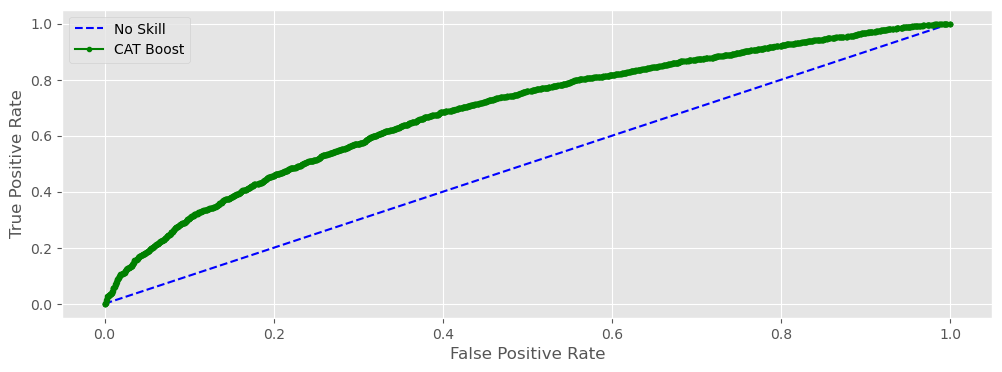

In [402]:
lr_probs = model_CAT.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='CAT Boost')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [403]:
Y_pred = model_CAT.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[  52, 1578],
       [  54, 8950]], dtype=int64)

In [404]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.49      0.03      0.06      1630
           1       0.85      0.99      0.92      9004

    accuracy                           0.85     10634
   macro avg       0.67      0.51      0.49     10634
weighted avg       0.80      0.85      0.79     10634



In [405]:
performance_report = classification_report(Y_test, Y_pred, output_dict=True)

In [406]:
evaluate_performance(Y_test, Y_pred)

{'accuracy': 0.8465299981192401,
 'precision': 0.850113981762918,
 'recall': 0.994002665482008}

In [407]:
model_summary = evaluate_performance(Y_test, Y_pred)
model_summary['model'] = 'CAT'
model_summary['auroc'] = lr_auc

In [408]:
CAT = pd.DataFrame([model_summary])

In [409]:
results_model_CAT = pd.DataFrame([model_summary], index={'7'})
results = pd.concat([results, results_model_CAT])
results

,accuracy,precision,recall,model,auroc
1,0.748,0.858,0.842,DecisionTreeClassifier(),0.537
2,0.847,0.847,1.000,LogisticRegression(),0.660
4,0.846,0.848,0.997,RandomForest,0.674
5,0.847,0.847,1.000,SVM,0.527
5,0.842,0.851,0.986,XGBoost,0.666
6,0.846,0.849,0.996,ADA,0.685
7,0.847,0.850,0.994,CAT,0.689


### BaggingClassifier

In [410]:
model_bagging=BaggingClassifier()
model_bagging.fit(X_train_smote, Y_train_smote)

#Y_pred=model_bagging.predict(X_test)
#Y_pred1=model_bagging.predict_proba(X_test)

In [411]:
ns_probs = [0 for _ in range(len(Y_test))]

No Skill: ROC AUC=0.500
Bagging: ROC AUC=0.622


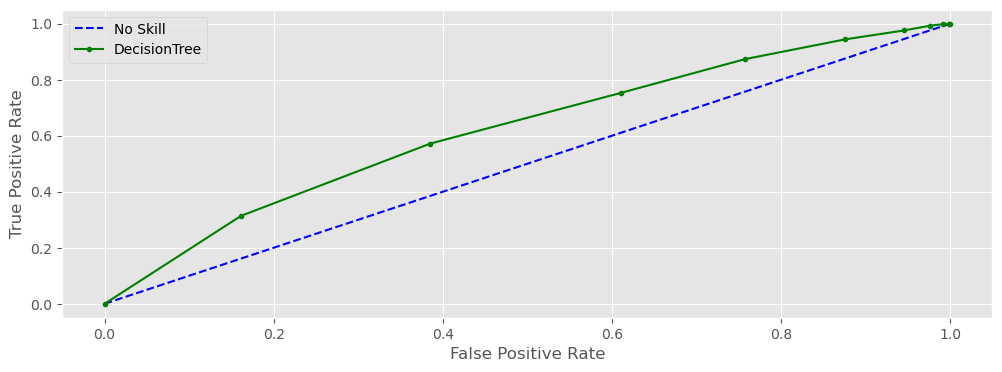

In [412]:
lr_probs = model_bagging.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Bagging: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='DecisionTree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [413]:
Y_pred = model_bagging.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[ 202, 1428],
       [ 502, 8502]], dtype=int64)

In [414]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.29      0.12      0.17      1630
           1       0.86      0.94      0.90      9004

    accuracy                           0.82     10634
   macro avg       0.57      0.53      0.54     10634
weighted avg       0.77      0.82      0.79     10634



In [415]:
performance_report = classification_report(Y_test, Y_pred, output_dict=True)

In [416]:
evaluate_performance(Y_test, Y_pred)

{'accuracy': 0.8185066766973857,
 'precision': 0.8561933534743202,
 'recall': 0.944247001332741}

In [417]:
model_summary = evaluate_performance(Y_test, Y_pred)
model_summary['model'] = 'bagging'
model_summary['auroc'] = lr_auc

In [418]:
bagging = pd.DataFrame([model_summary])

In [419]:
results_model_bagging = pd.DataFrame([model_summary], index={'9'})
results = pd.concat([results, results_model_bagging])
results

,accuracy,precision,recall,model,auroc
1,0.748,0.858,0.842,DecisionTreeClassifier(),0.537
2,0.847,0.847,1.000,LogisticRegression(),0.660
4,0.846,0.848,0.997,RandomForest,0.674
5,0.847,0.847,1.000,SVM,0.527
5,0.842,0.851,0.986,XGBoost,0.666
6,0.846,0.849,0.996,ADA,0.685
7,0.847,0.850,0.994,CAT,0.689
9,0.819,0.856,0.944,bagging,0.622


#### Najlepsze wyniki AUROC uzyskały modele:


###### - ADABoost - 0.685
###### - CATBoost - 0.689
###### - RandomForest	0.675

In [420]:
# Jako ostateczny model wybieram Random Forest

### Parametry

In [421]:
### Random Forest - domyślne parametry

In [422]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(X_train_smote, Y_train_smote)

Y_pred=random_forest_model.predict(X_test)
Y_pred1=random_forest_model.predict_proba(X_test)

In [423]:
Y_pred = random_forest_model.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[  16, 1614],
       [  28, 8976]], dtype=int64)

In [424]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.36      0.01      0.02      1630
           1       0.85      1.00      0.92      9004

    accuracy                           0.85     10634
   macro avg       0.61      0.50      0.47     10634
weighted avg       0.77      0.85      0.78     10634



In [ ]:
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
print(auc)

In [425]:
## Ustawiam parametry ręcznie

In [426]:
random_forest_manual = RandomForestClassifier(n_estimators= 200, 
                                              max_depth = 20, 
                                              min_samples_leaf = 20, 
                                              min_samples_split = 5,
                                              random_state= 42)

random_forest_manual.fit(X_train_smote, Y_train_smote)

Y_pred = random_forest_manual.predict(X_test)
Y_pred1 = random_forest_manual.predict_proba(X_test)

In [427]:
confusion_matrix(Y_test, Y_pred)

array([[  16, 1614],
       [  28, 8976]], dtype=int64)

In [428]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.36      0.01      0.02      1630
           1       0.85      1.00      0.92      9004

    accuracy                           0.85     10634
   macro avg       0.61      0.50      0.47     10634
weighted avg       0.77      0.85      0.78     10634



In [ ]:
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
print(auc)

In [429]:
## Random Search 
# żeby unikąć przeuczenia modelu na danych treningowych, zastosuję cros walidację

In [430]:
param_random = {'n_estimators': np.arange(100,800,100),
              'max_features' : ['log2', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'max_depth' : np.arange(10,100,10),
              'max_leaf_nodes': np.arange(2,5,10),
             }

In [431]:
from sklearn.model_selection import RandomizedSearchCV

random_forest_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                          param_distributions = param_random, 
                                          n_iter = 100,
                                          cv = 3, 
                                          verbose=2, 
                                          random_state=42, 
                                          n_jobs = -1)

In [432]:
random_forest_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'max_features': ['log2', 'sqrt'],
                                        'max_leaf_nodes': array([2]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700])},
                   random_state=42, verbose=2)

In [433]:
# Na podstawie najlepszej kombinacji hyperparametrow, buduję ostateczny model

In [496]:
random_forest_best = RandomForestClassifier(n_estimators= 600,
                                            min_samples_split= 10, 
                                            min_samples_leaf = 4,
                                            max_leaf_nodes= 2,
                                            max_features= 'sqrt',
                                            max_depth= 90)

In [497]:
random_forest_best.fit(X_train_smote,Y_train_smote)

RandomForestClassifier(max_depth=90, max_features='sqrt', max_leaf_nodes=2,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=600)

In [498]:
X_train_smote, Y_train_smote = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(random_forest_best, X_train_smote, Y_train_smote, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.800


In [499]:
Y_pred = random_forest_best.predict(X_test)
Y_pred1 = random_forest_best.predict_proba(X_test)

D:\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 38 features, but RandomForestClassifier is expecting 2 features as input.

In [500]:
confusion_matrix(Y_test, Y_pred)

array([[   0, 1630],
       [   0, 9004]], dtype=int64)

In [447]:
ns_probs = [0 for _ in range(len(Y_test))]

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.662


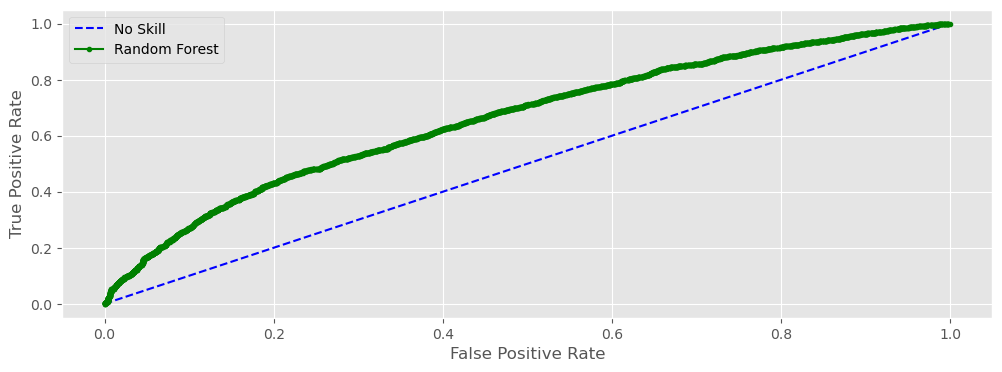

In [448]:
lr_probs = random_forest_best.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [441]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1630
           1       0.85      1.00      0.92      9004

    accuracy                           0.85     10634
   macro avg       0.42      0.50      0.46     10634
weighted avg       0.72      0.85      0.78     10634



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [444]:
model_summary = evaluate_performance(Y_test, Y_pred)
model_summary['model'] = 'RandomForest'
model_summary['auroc'] = lr_auc

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [445]:
RandomForest = pd.DataFrame([model_summary])
RandomForest

### Bias-variance tradeoff

In [450]:
def plot_learning_curve(estimator, title, X, Y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Funkcja zwraca wykres krzywej uczenia dla zbioru treningowego i testowego
    
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, Y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

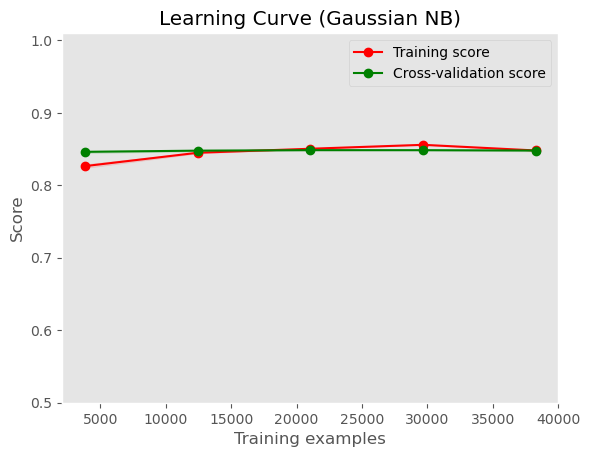

In [451]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
plot_learning_curve(model_gnb, 'Learning Curve (Gaussian NB)', X, Y, (0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

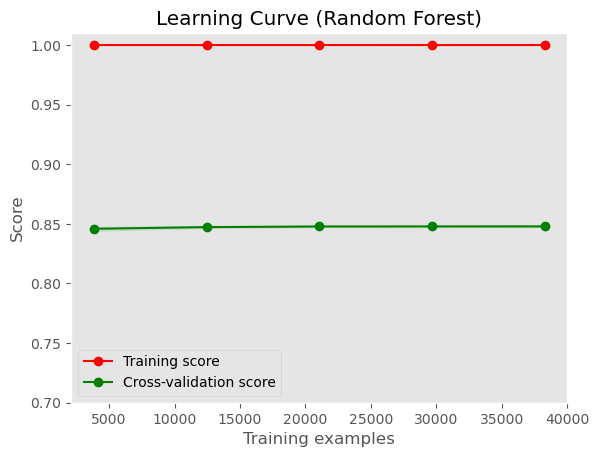

In [452]:
model_rb = RandomForestClassifier(random_state=0)
plot_learning_curve(model_rb, 'Learning Curve (Random Forest)', X, Y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

### Feature importances

In [456]:
feature_importances = pd.DataFrame(random_forest_best.feature_importances_,columns=['Imp']).sort_values('Imp',ascending=False)

In [457]:
def feature_importance(model, labels):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    temp = pd.DataFrame(importances[indices], X.columns[indices])
    temp.columns = ["Feature importance"]
    temp["Feature name"] = temp.index
    plt.subplots(figsize=(10, 8))
    ax = sns.barplot(
        y="Feature name",
        x="Feature importance",
        data=temp.iloc[:20, ]
    )
    plt.title("Feature Importance_"+labels)
    plt.savefig(labels+'_FI.png', dpi=150)
    return

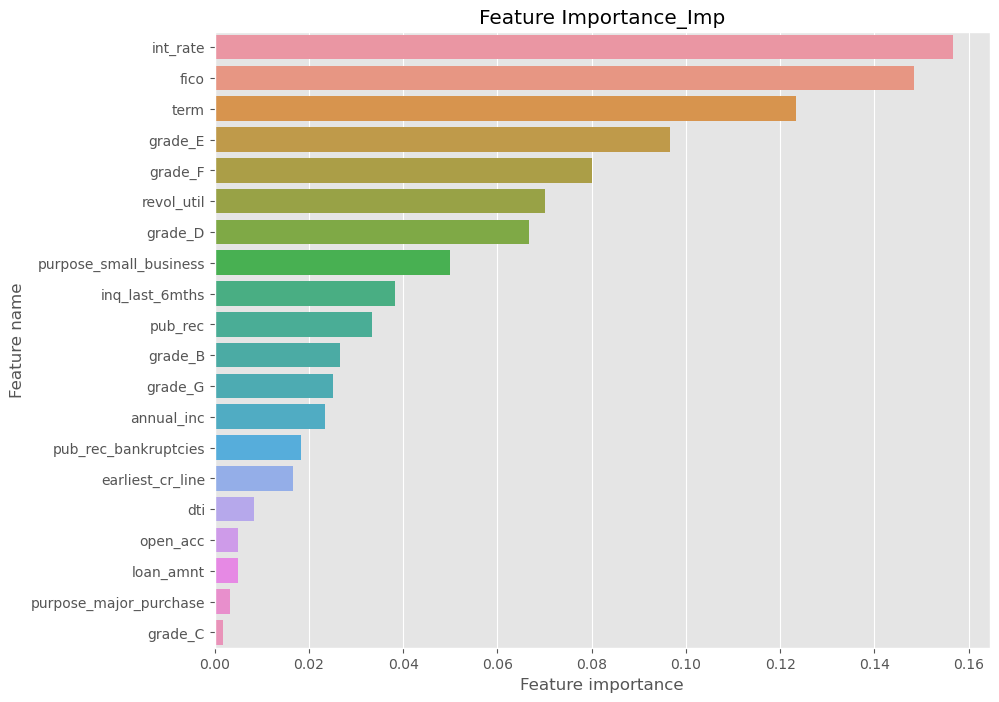

In [458]:
feature_importance(random_forest_best, 'Imp')

In [ ]:
# Model największą moc predykcyjną przypisał 'int_rate' - wysokość oprocentowania kredytu i wskaźnikowi fico. Co wydaje się
# być oczywiste. Dziwi mnie, że annual_inc i loan_amnt są tak nisko. Wydawałoby się, że będą najważniejszymi czynnikami